In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [3]:
path_humano = "./anotaciones_corrupcion_simplificado.csv"
df_humano = pd.read_csv(path_humano, header=0)

path_llama = "./responses_simplificado.csv"
df_llama = pd.read_csv(path_llama, header=0, sep=';')

In [4]:
df_llama

,pagina,tipo_entidad,origen_entidad,proposito,informacion_presentada,vision,consecuencias,que_muestra,intencion,localidad_problema,involucrados,formalidad,nivel_educacion,tono,emociones
0,277,c),b),h),a),a),c),b),b),b),g),a),a),b),h)
1,277,c),b),h),a),a),c),b),b),b),g),a),b),a),h)
2,277,c),b),h),a),a),c),b),b),b),a) e) f) h),a),b),b),h)
3,277,c),b),h),a),a),c),b),a),b),f),a),b),a),h)
4,277,c),b),h),a),a),b),b),a),b),h),a),b),a),g)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,285,i),b),d),a),a),c),c),c),b),d) e) f),b),b),a),a) e)
76,285,a),b),d),a),a),c),c),b),b),e) g),a),a),a),h)
77,285,i),b),d),a),a),c),c),a) b) d),b),b) c) d) e) f) h),a),b),a),c) d) f)
78,285,i),b),d),a),a),c),c),e),b),a) c) e) f) g),b),b),a),g)


In [5]:
incisos_tipo = {"a)": "a) ONG (Organización No Gubernamental) o de la sociedad civil.",
                "b)": "b) Gobierno.",
                "c)": "c) Organismo internacional.",
                "d)": "d) Prensa tradicional.",
                "e)": "e) Agencia digital de noticias.",
                "f)": "f) Empresas.",
                "g)": "g) Plataformas educativas.",
                "h)": "h) Academia.",
                "i)": "i) Blogs."
                }

incisos_origen = {"a)": "a) Nacional",
                  "b)": "b) Internacional"}

incisos_proposito = {"a)": "a) Denunciar un caso específico",
                    "b)": "b) Reportar o comentar una situación",
                    "c)": "c) Mostrar estadísticas del problema",
                    "d)": "d) Educar sobre el tema",
                    "e)": "e) Exponer una opinión",
                    "f)": "f) Propaganda política",
                    "g)": "g) Alertar sobre una situación general",
                    "h)": "h) Guía o información para realizar el proceso de denuncia de un caso de corrupción",
                    "i)": "i) Página para registrar de una denuncia o un aviso de un caso de corrupción"
                    }

incisos_informacion = {"a)": "a) Factual",
                       "b)": "b) Subjetiva",
                       "c)": "c) Emocional"
                       }

incisos_vision = {"a)": "a) Problema sistémico.",
                  "b)": "b) Delitos/casos/personas particulares",
                  "c)": "c) No aplica"
                  }

incisos_consecuencias = {"a)": "a) Penas y sanciones legales",
                         "b)": "b) Consecuencias no legales como castigo social o pérdida de estatus",
                         "c)": "c) Impunidad (falta de sanciones) de los actos de corrupción",
                         "d)": "d) No aplica"
                         }

incisos_que_muestra = {"a)": "a) Propuestas de solución a la corrupción",
                       "b)": "b) Problemas derivados de la corrupción",
                       "c)": "c) Ambos",
                       "d)": "d) Ninguna de las anteriores"
                       }

incisos_intencion = {"a)": "a) Conocer el diagnóstico de la situación de la corrupción",
                     "b)": "b) Tomar conciencia general del problema",
                     "c)": "c) Tomar acciones frente al problema",
                     "d)": "d) Tener esperanza",
                     "e)": "e) Realizar denuncias",
                     "f)": "f) No aplica"
                     }

incisos_localidad = {"a)": "a) Local",
                        "b)": "b) Nacional",
                        "c)": "c) Regional",
                        "d)": "d) Global",
                        "e)": "e) No aplica"
                        }

incisos_involucrados = {"a)": "a) Gobierno local",
                       "b)": "b) Gobierno nacional",
                       "c)": "c) Empresas",
                       "d)": "d) Ciudadanos concretos",
                       "e)": "e) Empleado público",
                       "f)": "f) Funcionario público",
                       "g)": "g) Tomadores de decisión no gubernamentales",
                       "h)": "h) Organizaciones internacionales o gobiernos extranjeros"
                       }

incisos_formalidad = {"a)": "a) Formal",
                      "b)": "b) Inormal"
                      }

incisos_educacion = {"a)": "a) Básica",
                           "b)": "b) Media",
                           "c)": "c) Superior"
                           }

incisos_tono = {"a)": "a) Positivo",
                "b)": "b) Negativo"
                }

incisos_emociones = {"a)": "a) Alegría",
                    "b)": "b) Tristeza",
                    "c)": "c) Ira",
                    "d)": "d) Miedo",
                    "e)": "e) Sorpresa",
                    "f)": "f) Vergüenza",
                    "g)": "g) Culpa",
                    "h)": "h) Ninguna"
                    }

incisos_dicts = {'tipo_entidad': incisos_tipo,
                 'origen_entidad': incisos_origen,
                 'proposito': incisos_proposito,
                 'informacion_presentada': incisos_informacion,
                 'vision': incisos_vision,
                 'consecuencias': incisos_consecuencias,
                 'que_muestra': incisos_que_muestra,
                 'intencion': incisos_intencion,
                 'localidad_problema': incisos_localidad,
                 'involucrados': incisos_involucrados,
                 'formalidad': incisos_formalidad,
                 'nivel_educacion': incisos_educacion,
                 'tono': incisos_tono,
                 'emociones': incisos_emociones}

In [6]:
def extraer_incisos(cadena: str, unico=False):
    """
    Devuelve solo los incisos (a), b), ...) extraídos de la cadena.
    - unico=True: devuelve solo el primer inciso encontrado (o "")
    - unico=False: devuelve todos los incisos separados por espacio
    """
    if not isinstance(cadena, str):
        return ""
    # Busca incisos válidos (ajusta rango [a-i] según tu caso)
    encontrados = re.findall(r'([a-i]\))', cadena.lower())
    if unico:
        return encontrados[0] if encontrados else ""
    else:
        # quitar duplicados preservando orden
        vistos = set()
        unicos = [x for x in encontrados if not (x in vistos or vistos.add(x))]
        return " ".join(unicos)

In [7]:
df_humano.drop(columns=["Marca temporal", "Nombre", "Correo electrónico", "Tiempo aproximado (en minutos) que te tomo revisar el sitio web/texto y contestar todas las preguntas para este sitio web/texto específico:", "Algún comentario adicional que crees que es relevante indicar sobre la página web considerando las preguntas y la temática de corrupción (opcional):\n", "Algún comentario que quieras compartir sobre el cuestionario y la tarea de anotación que estás llevando a cabo (opcional):\n"], inplace=True)
df_humano.rename(columns={"Selecciona una de las 10 páginas a etiquetar": "pagina",
                    "1. Identifica el tipo de entidad que ha publicado el sitio web/texto:": "tipo_entidad",
                    "2. Origen de la entidad que publica el sitio web:": "origen_entidad",
                    '3. Identifica el principal propósito que tiene el contenido del sitio web:': "proposito",
                    '4. El  sitio web/texto principalmente presenta información de forma:': "informacion_presentada",
                    '5. Presenta una visión de la corrupción centrada en:': "vision",
                    '6. Respecto a las consecuencias de la corrupción el  sitio web/texto hace referencia a:': "consecuencias",
                    '7. El  sitio web/texto centra la atención en mostrar:': "que_muestra",
                    '8. Determine cuál es la intención del llamado general hacia el lector:': "intencion",
                    '9. Se presenta la corrupción como como un problema:': "localidad_problema",
                    '10. Entes involucrados o descritos en el sitio web/texto son:': "involucrados",
                    '11. Respecto al estilo del sitio web/texto, seleccione el nivel de formalidad en el lenguaje:': "formalidad",
                    '12. Estime el nivel de educación necesario para comprender todo el sitio web/texto (o al que parece que se dirigirá el sitio web/texto):': "nivel_educacion",
                    '13. El tono general del sitio web/texto es:': "tono",
                    '14. Apela a alguna de las siguientes emociones:': "emociones"
                    }, inplace=True)

In [8]:
df_llama['pagina'].unique()

array([277,  29, 304, 356, 376, 300, 326, 285])

In [9]:
import json
Nombre_Archivo = f"../buscador/resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)
all_hrefs

url2idx = {u: i for i, u in enumerate(all_hrefs)}

urls = df_humano["pagina"].unique()
paginas = [url2idx[p.split()[1]] for p in urls]
print(paginas)

df_humano['pagina'] = df_humano['pagina'].apply(lambda x: url2idx[x.split()[1]])
#df_llama['pagina'] = df_llama['pagina'].apply(lambda x: url2idx[urls[x-1].split()[1]])

[26, 29, 277, 285, 300, 304, 326, 356, 376, 399]


In [10]:
preguntas = df_humano.columns[1:]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localidad_problema", "involucrados", "emociones"]

for p in preguntas:
    df_humano[p] = df_humano[p].apply(extraer_incisos, unico=(p not in multi_answer))
    df_llama[p] = df_llama[p].apply(extraer_incisos, unico=(p not in multi_answer))

In [11]:
num = df_humano['pagina'].astype(str).str.extract(r'^\s*(\d+)')  # captura dígitos al inicio
df_humano['pagina'] = num.fillna(df_humano['pagina']).astype(str)
df_humano['pagina'] = pd.to_numeric(df_humano['pagina'], errors='coerce').astype('Int64')
#df_humano.head()

In [12]:
def calcular_porcentajes(df, pregunta, orden_paginas, posibles_list=None):
    """Devuelve tabla porcentual (páginas × respuestas/incisos)."""
    if posibles_list is None:
        # respuesta única
        tabla = (df.groupby(["pagina", pregunta]).size().unstack(fill_value=0))
        tabla = tabla.reindex(orden_paginas, fill_value=0)
        return tabla.div(tabla.sum(axis=1).replace(0,1), axis=0) * 100
    else:
        # multi-respuesta (incisos separados por espacios)
        posibles_set = set(posibles_list)
        tmp = df[["pagina", pregunta]].copy()
        tmp[pregunta] = tmp[pregunta].fillna("").astype(str).str.strip().str.lower()
        tmp["inciso"] = tmp[pregunta].apply(
            lambda s: list(dict.fromkeys(t for t in s.split() if t in posibles_set))
        )
        den = tmp.groupby("pagina").size().reindex(orden_paginas, fill_value=0)
        expd = tmp.explode("inciso", ignore_index=True)
        expd = expd[expd["inciso"].notna() & (expd["inciso"] != "")]
        counts = expd.groupby(["pagina", "inciso"]).size().unstack(fill_value=0)
        counts = counts.reindex(orden_paginas, columns=posibles_list, fill_value=0)
        return counts.div(den.replace(0,1), axis=0) * 100
    
def conjuntos_activos(porcentajes: pd.DataFrame, umbral: float) -> dict:
    """
    Devuelve {pagina: set(incisos)} con incisos activos por página (>= umbral %).
    porcentajes: DataFrame (index=paginas, columns=incisos) con %.
    """
    activos = {}
    for pag, fila in porcentajes.iterrows():
        incisos = set(fila.index[fila.values >= umbral])
        activos[pag] = incisos
    return activos

def jaccard(act_humano: dict, act_llama: dict, paginas: list) -> pd.Series:
    vals = []
    idx  = []
    for pag in paginas:
        A = act_humano.get(pag, set())
        B = act_llama.get(pag, set())
        union = len(A | B)
        inter = len(A & B)
        score = inter / union if union > 0 else 1.0  # si ambos vacíos, los consideramos iguales (=1)
        vals.append(score); idx.append(pag)
    return pd.Series(vals, index=idx, name="jaccard")

Precisión para tipo_entidad: 0.70


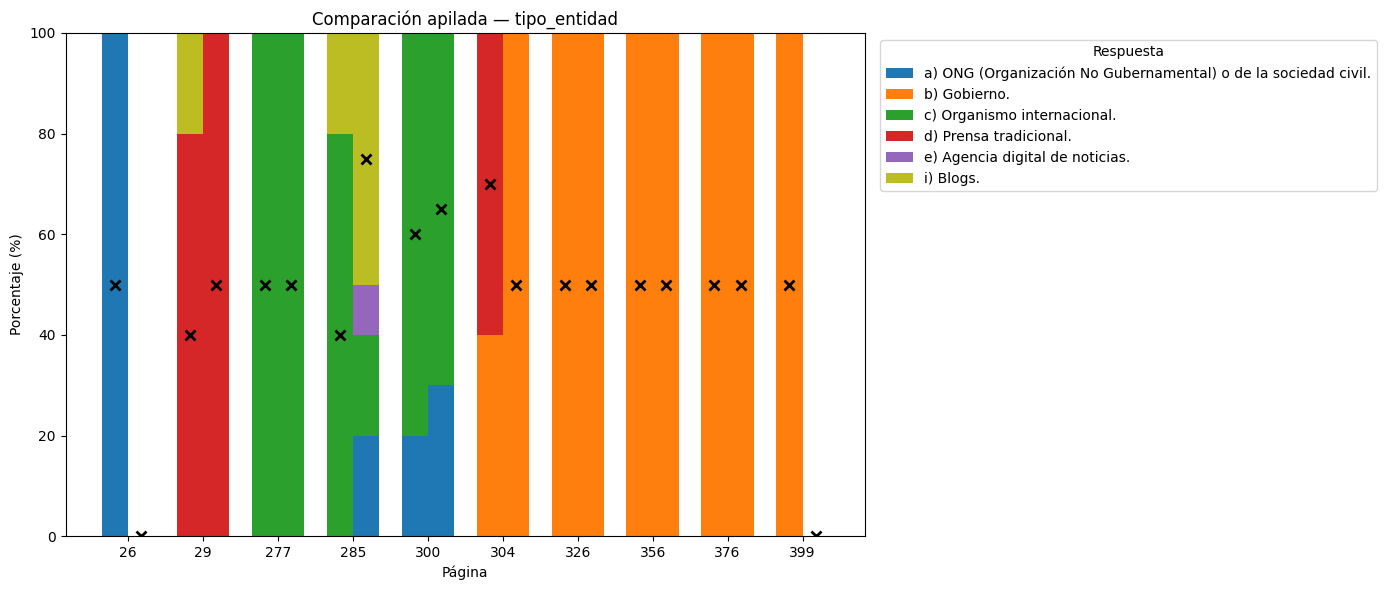

Precisión para origen_entidad: 0.80


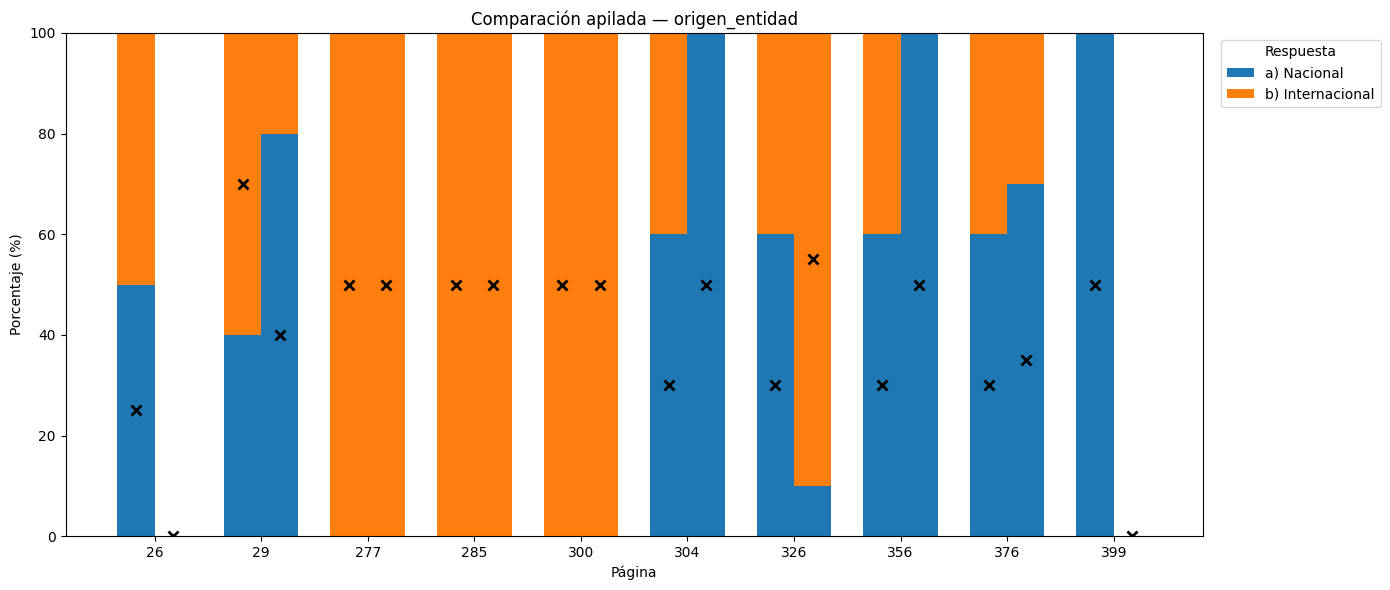

[proposito] Jaccard medio = 0.350


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


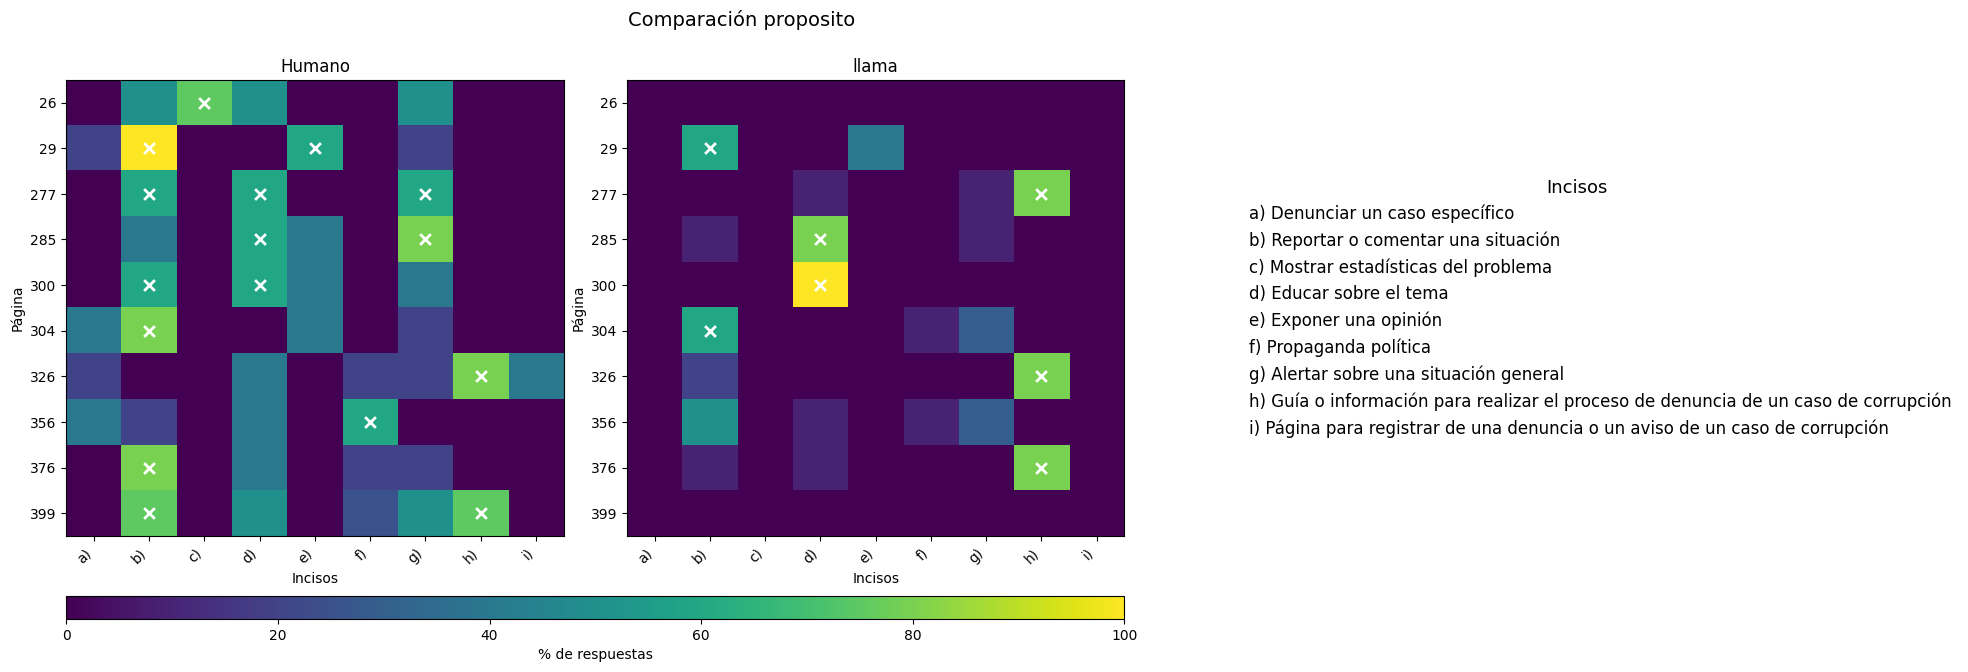

[informacion_presentada] Jaccard medio = 0.700


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


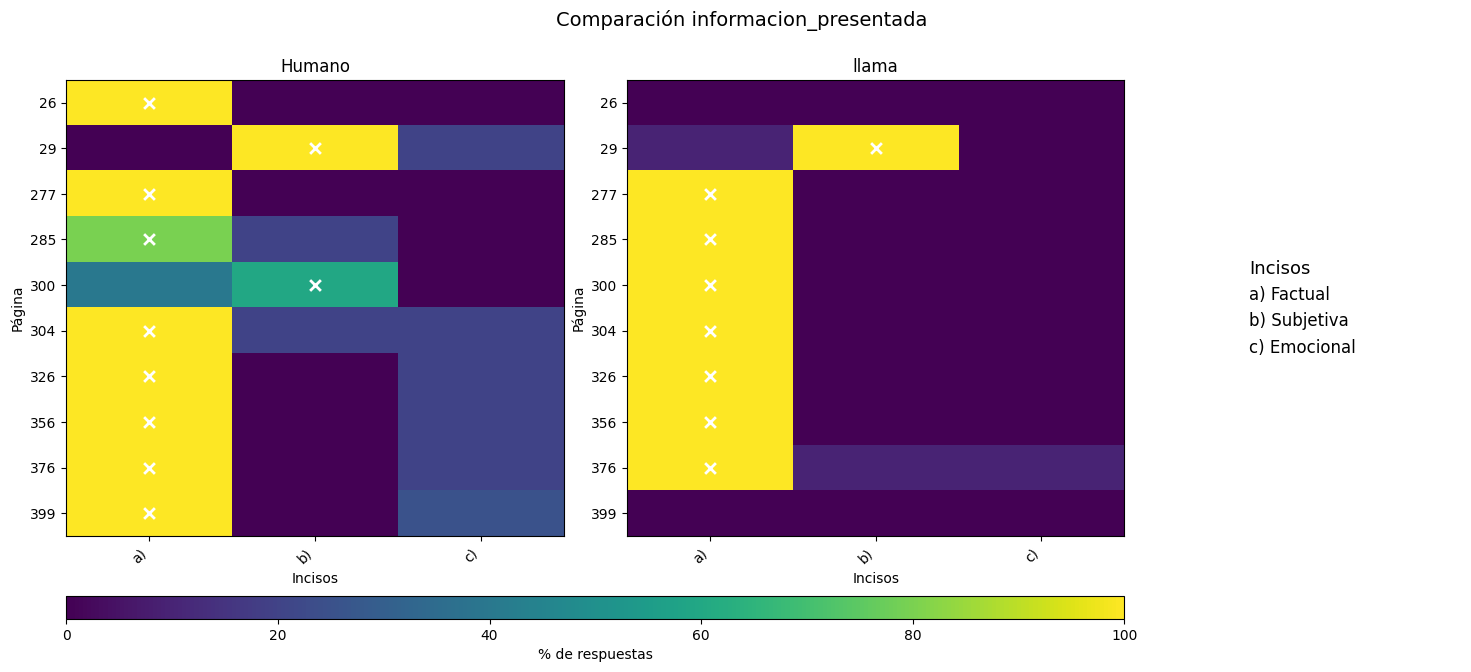

Precisión para vision: 0.70


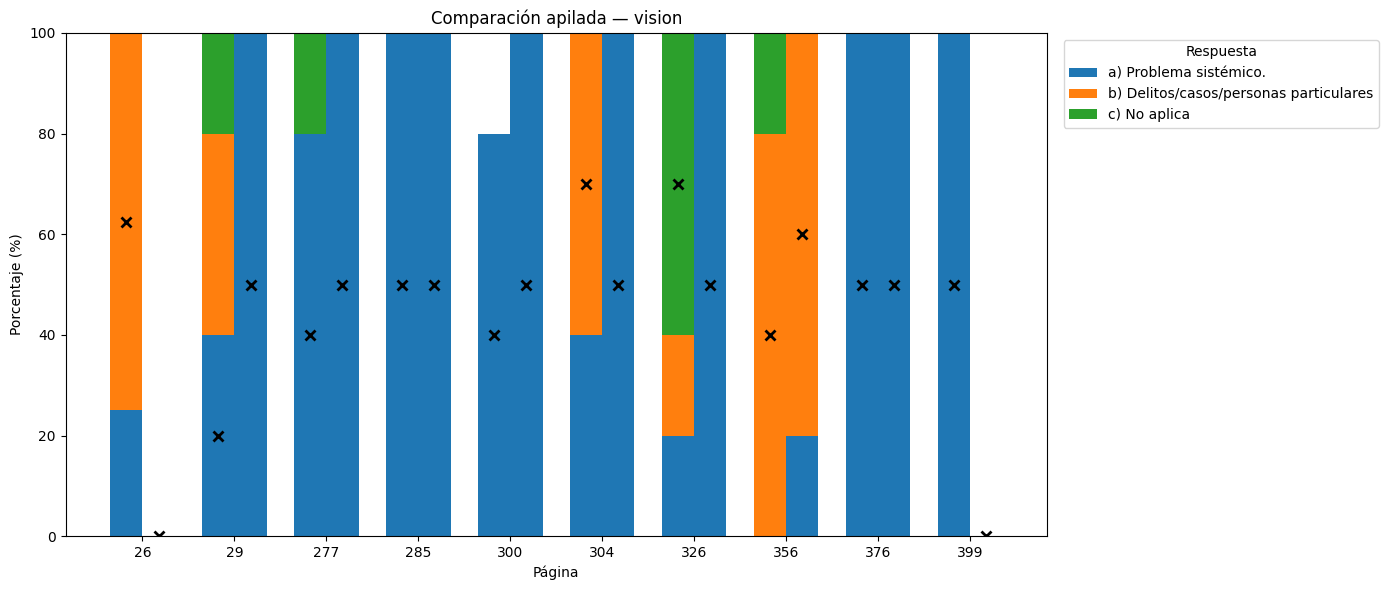

[consecuencias] Jaccard medio = 0.450


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


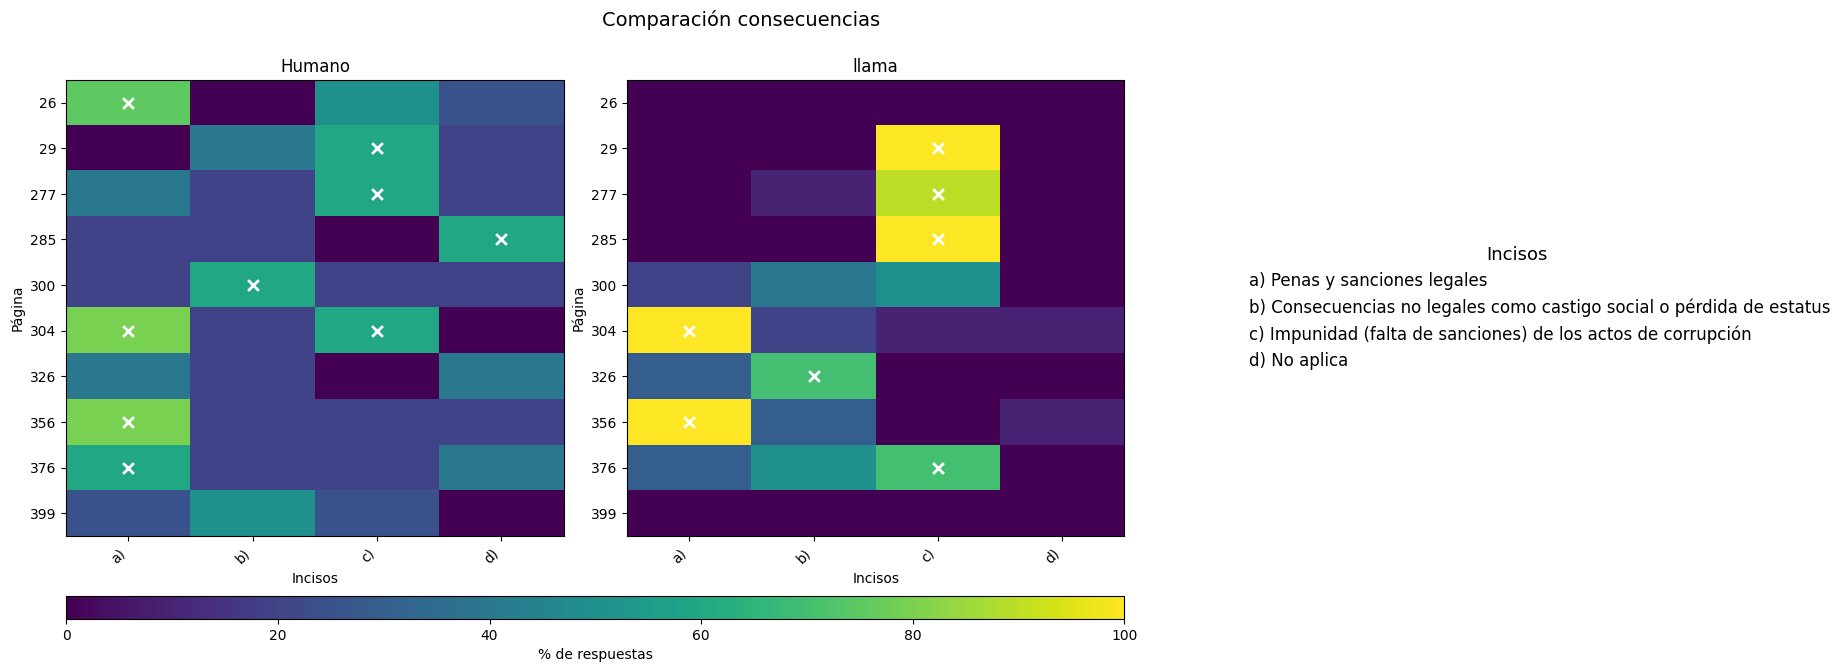

Precisión para que_muestra: 0.10


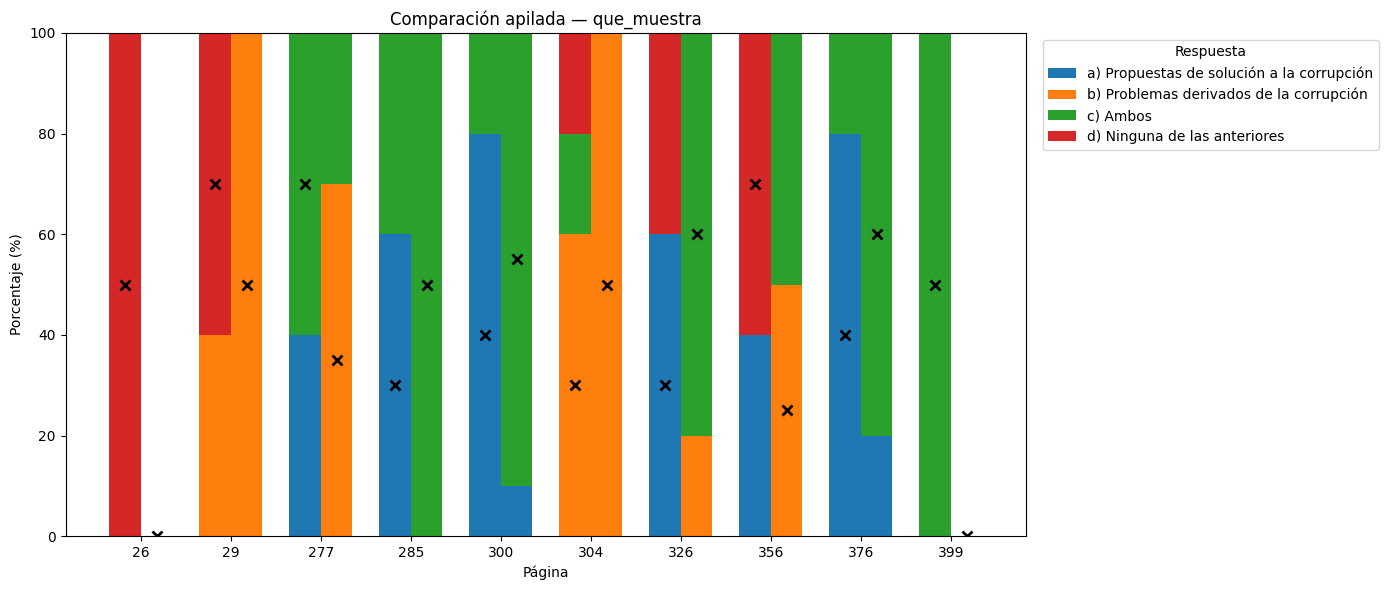

[intencion] Jaccard medio = 0.183


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


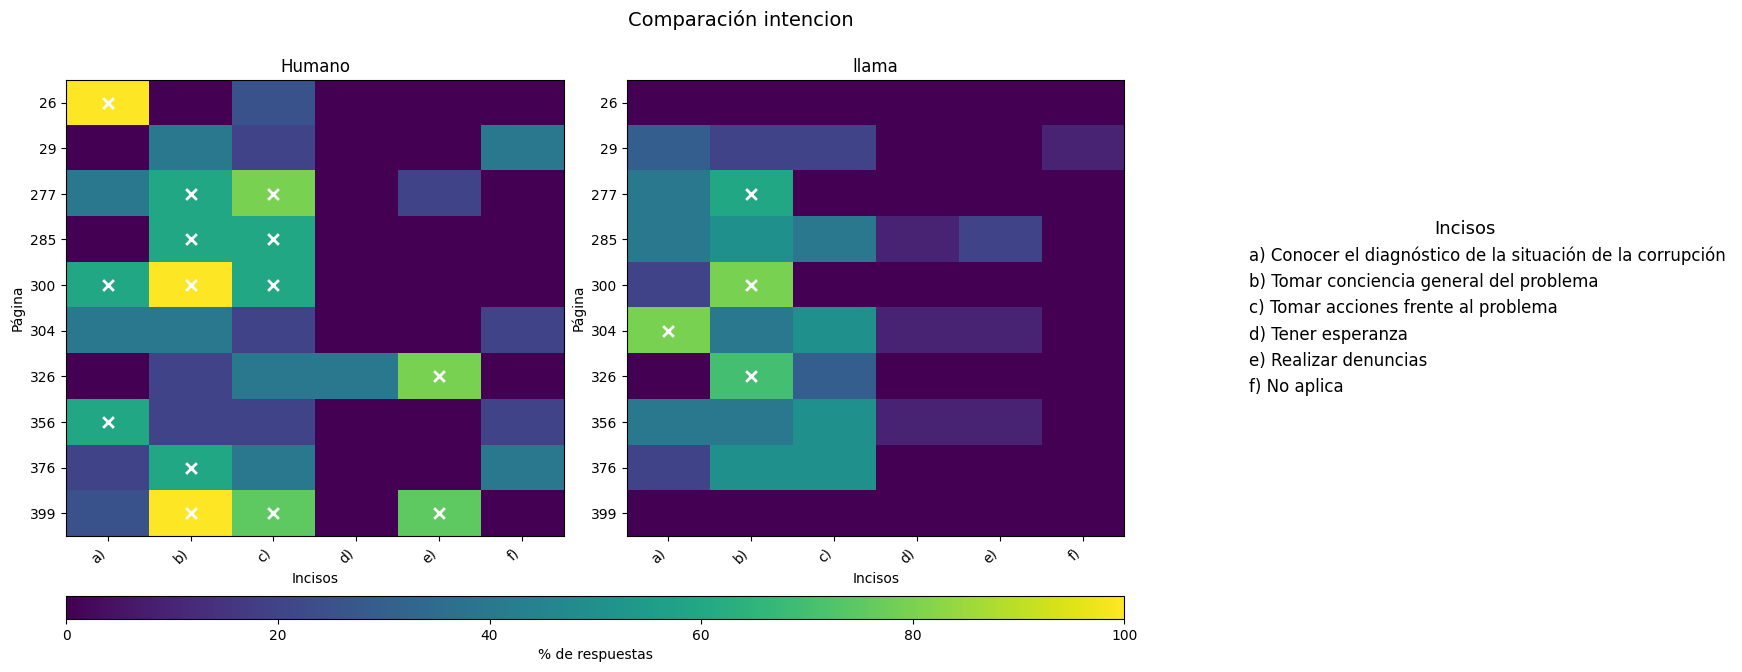

[localidad_problema] Jaccard medio = 0.300


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


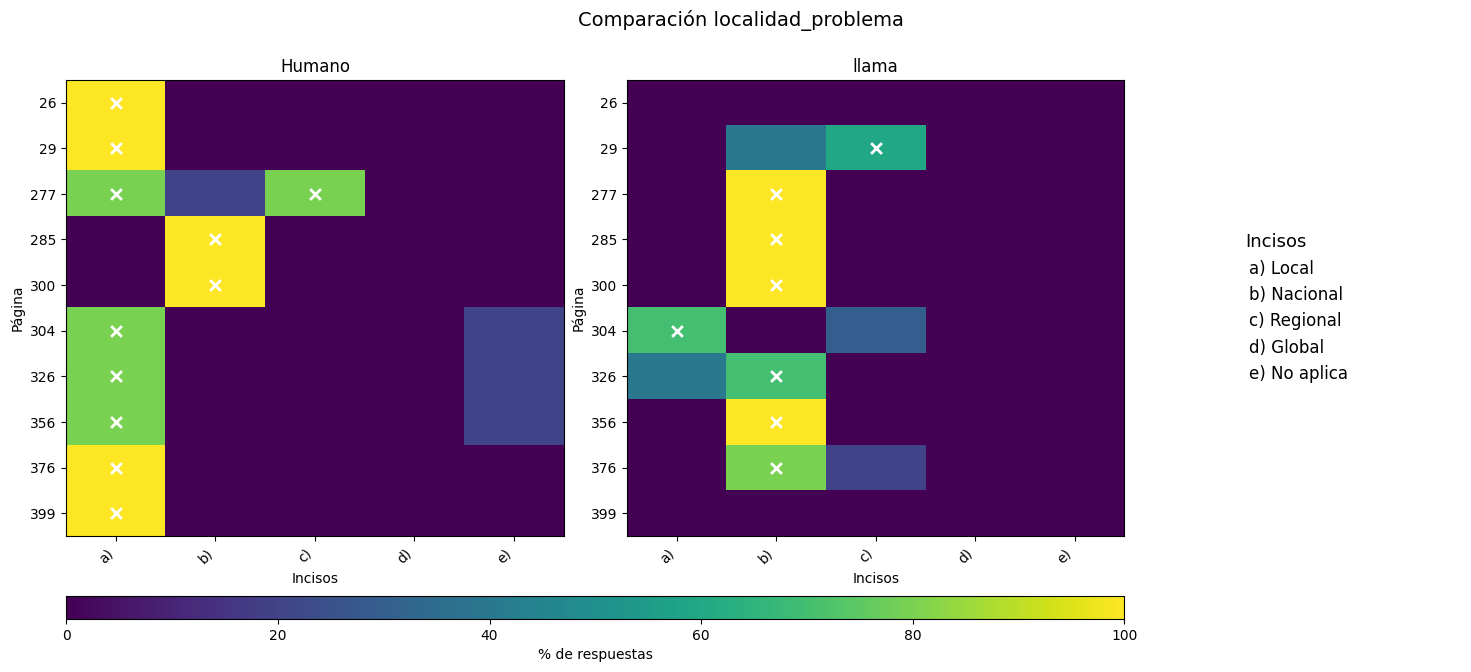

[involucrados] Jaccard medio = 0.253


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


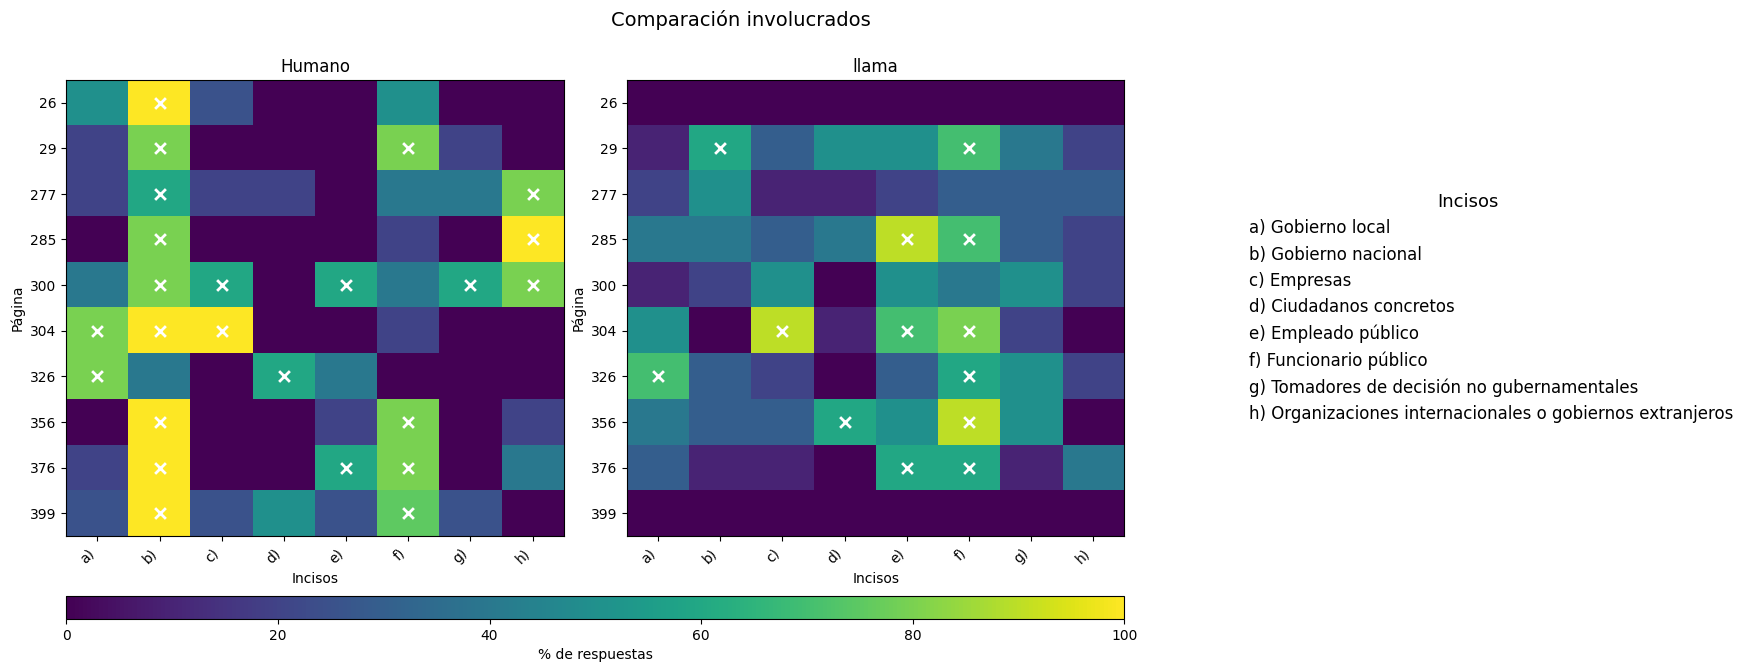

Precisión para formalidad: 0.60


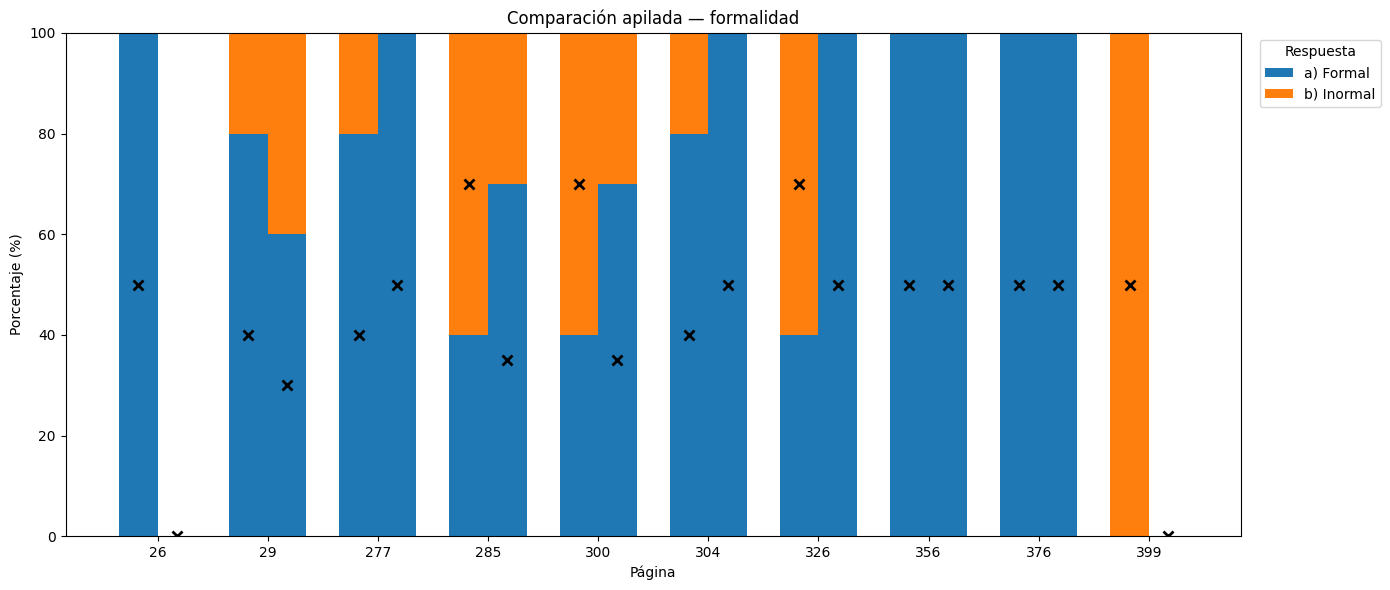

Precisión para nivel_educacion: 0.80


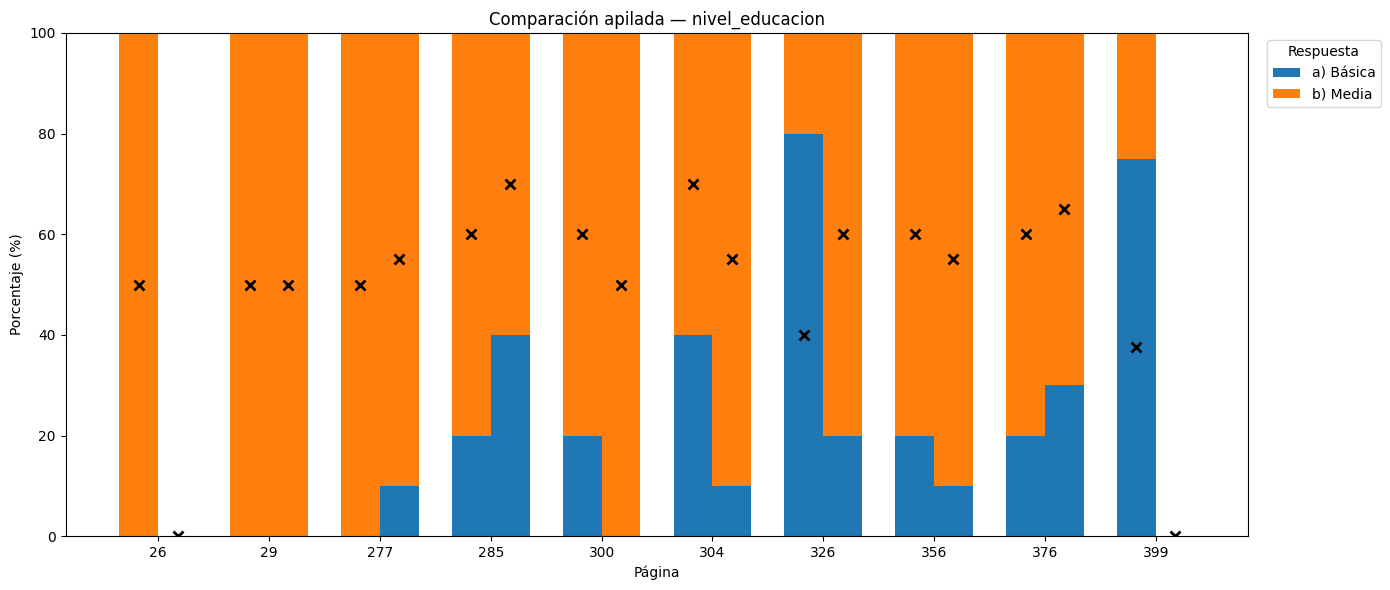

Precisión para tono: 0.20


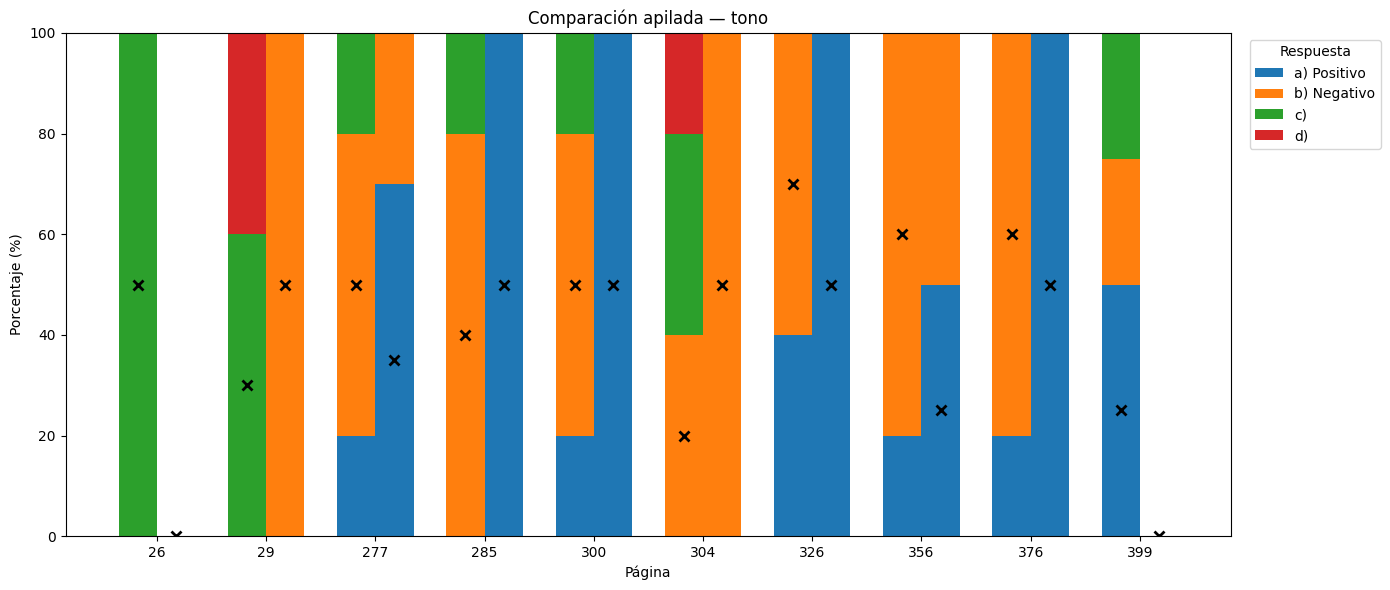

[emociones] Jaccard medio = 0.400


/tmp/ipykernel_5578/402022986.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


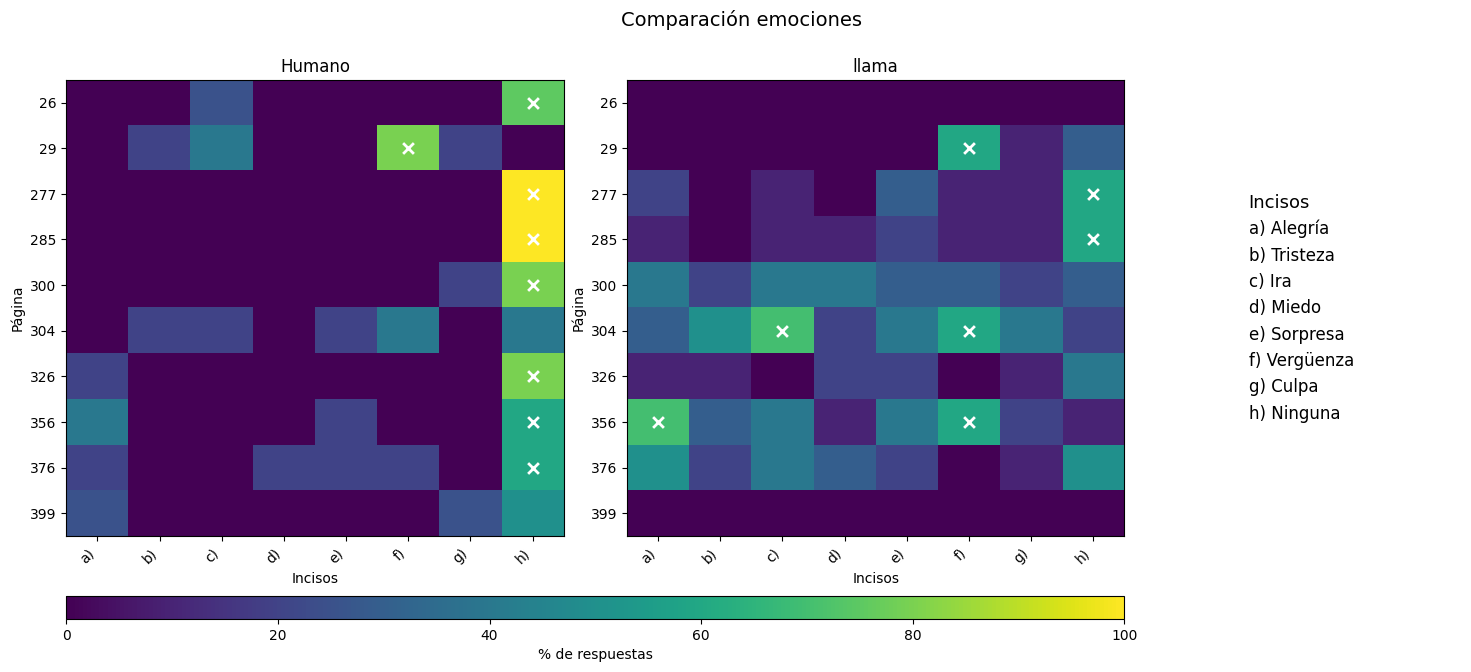

Porcentajes medios de consenso por página:
        humano  llama  igual
pagina                      
26       89.29   0.00   0.00
29       74.29  80.00   0.57
277      81.43  83.57   0.57
285      81.43  82.86   0.50
300      77.14  82.14   0.43
304      67.14  90.00   0.71
326      72.86  82.14   0.36
356      78.57  80.71   0.50
376      82.86  79.29   0.50
399      85.71   0.00   0.00
Precisión media (respuestas únicas): 0.557
Jaccard medio (respuestas únicas): 0.377


In [13]:
from sklearn.metrics import accuracy_score

porcentaje_concenso = 60

orden = {}
orden_paginas = sorted(paginas)

preguntas = df_humano.columns[1:]
orden_cols = ['pagina', 'tipo_entidad', 'origen_entidad', 'proposito',
              'informacion_presentada', 'vision', 'consecuencias', 'que_muestra',
              'intencion', 'localidad_problema', 'involucrados', 'formalidad',
              'nivel_educacion', 'tono', 'emociones'
              ]
multi_answer = ["proposito", "informacion_presentada", "consecuencias", "intencion", "localidad_problema", "involucrados", "emociones"]
incisos_posibles = {"proposito": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)'],
                    "informacion_presentada": ['a)', 'b)', 'c)'],
                    "consecuencias": ['a)', 'b)', 'c)', 'd)'],
                    "intencion": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)'],
                    "localidad_problema": ['a)', 'b)', 'c)', 'd)', 'e)'],
                    "involucrados": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)'],
                    "emociones": ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']
                    }

#out = Path("./graficas")
#out.mkdir(exist_ok=True)

# Paleta de colores global
inc = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)"]
colores = plt.cm.tab10.colors  # o 'tab20', 'Set3', etc.
color_map = {c: colores[i % len(colores)] for i, c in enumerate(inc)}

accuracies = []
jaccards = []

df_consensos = []

for p in preguntas:
    if p not in multi_answer:
        tabla_humano = calcular_porcentajes(df_humano, p, orden_paginas).reindex(orden_paginas)
        tabla_llama = calcular_porcentajes(df_llama, p, orden_paginas).reindex(orden_paginas)

        consenso_humano = tabla_humano.max(axis=1).rename("humano")
        consenso_llama = tabla_llama.max(axis=1).rename("llama")
        mayor_humano = tabla_humano.idxmax(axis=1)
        mayor_llama = tabla_llama.idxmax(axis=1)

        df_consenso_p = pd.concat([consenso_humano, consenso_llama], axis=1)
        df_consenso_p['pregunta'] = p
        df_consenso_p['pagina'] = df_consenso_p.index
        df_consenso_p['igual'] = ((mayor_humano == mayor_llama) & (consenso_humano > 0) & (consenso_llama > 0))
        df_consensos.append(df_consenso_p)

        valid = (tabla_humano.sum(axis=1) > 0) | (tabla_llama.sum(axis=1) > 0)
        tf = tabla_humano[valid].fillna(0)
        tl = tabla_llama[valid].fillna(0)

        mayor_humano = tf.idxmax(axis=1)
        mayor_llama = tl.idxmax(axis=1)
        mf_emp = tf.apply(lambda r: set(r.index[r.eq(r.max())]), axis=1)
        ml = tl.idxmax(axis=1)  

        tabla_humano["origen"] = "Humano"
        tabla_llama["origen"] = "llama"

        acc = np.mean([ml.loc[i] in mf_emp.loc[i] for i in mf_emp.index])
        accuracies.append(acc)
        print(f"Precisión para {p}: {acc:.2f}")

        df_long = pd.concat([tabla_humano, tabla_llama]).reset_index(names="pagina")
        df_long = df_long.melt(id_vars=["pagina","origen"], var_name="respuesta", value_name="porcentaje")

        pivot = df_long.pivot_table(index=["pagina","origen"], 
                                    columns="respuesta", values="porcentaje", fill_value=0)

        fig, ax = plt.subplots(figsize=(14,6))

        bar_width = 0.35
        xpos = np.arange(len(orden_paginas))
        xlabels = [str(x) for x in orden_paginas]

        cols = [c for c in inc if c in pivot.columns]  # incisos: ['a)','b)',...]
        #colores = plt.rcParams['axes.prop_cycle'].by_key()['color']
        #color_map = {c: colores[i % len(colores)] for i, c in enumerate(cols)}
        etiquetas_largas = {c: incisos_dicts[p].get(c, c) for c in cols}

        for j, origen in enumerate(["Humano","llama"]):
            bottom = np.zeros(len(orden_paginas))
            vals_df = pivot.xs(origen, level="origen")[cols].reindex(orden_paginas, fill_value=0)
            vals_mat = vals_df.to_numpy()
            max_vals = vals_mat.argmax(axis=1)
            for k, col in enumerate(cols):
                vals = vals_df[col].values
                ax.bar(
                    xpos + (j-0.5)*bar_width, vals, bar_width,
                    bottom=bottom,
                    color=color_map[col],
                    label=etiquetas_largas[col] if j==0 else "_nolegend_"
                )
                for i_pag, v in enumerate(vals):
                    #if v >= porcentaje_concenso:
                    if max_vals[i_pag] == k:
                        xc = xpos[i_pag] + (j-0.5)*bar_width
                        yc = bottom[i_pag] + v / 2
                        ax.plot(xc, yc, marker='x', markersize=7, color='k', mew=2)
                bottom += vals

        ax.set_xticks(xpos)
        ax.set_xticklabels(xlabels, rotation=0)
        ax.set_ylabel("Porcentaje (%)")
        ax.set_xlabel("Página")
        ax.set_title(f"Comparación apilada — {p}")
        ax.set_ylim(0, 100)  # misma escala

        ax.legend(title="Respuesta", bbox_to_anchor=(1.01, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

    else:
        # ========= MULTI-RESPUESTA (heatmaps) =========
        posibles_list = incisos_posibles[p]
        porcentajes_humano = calcular_porcentajes(df_humano, p, orden_paginas, posibles_list)
        porcentajes_llama = calcular_porcentajes(df_llama, p, orden_paginas, posibles_list)

        consenso_humano = porcentajes_humano.max(axis=1).rename("humano")
        consenso_llama = porcentajes_llama.max(axis=1).rename("llama")
        mayor_humano = porcentajes_humano.idxmax(axis=1)
        mayor_llama = porcentajes_llama.idxmax(axis=1)

        df_consenso_p = pd.concat([consenso_humano, consenso_llama], axis=1)
        df_consenso_p['pregunta'] = p
        df_consenso_p['pagina'] = df_consenso_p.index
        df_consenso_p['igual'] = ((mayor_humano == mayor_llama) & (consenso_humano > 0) & (consenso_llama > 0))
        df_consensos.append(df_consenso_p)

        act_humano  = conjuntos_activos(porcentajes_humano, porcentaje_concenso)
        act_llama  = conjuntos_activos(porcentajes_llama, porcentaje_concenso)
        jac_series = jaccard(act_humano, act_llama, orden_paginas)
        print(f"[{p}] Jaccard medio = {jac_series.mean():.3f}")
        jaccards.append(jac_series.mean())

        fig = plt.figure(figsize=(18, 7))

        gs = gridspec.GridSpec(
            2, 3,
            width_ratios=[1, 1, 0.55],     # ajusta 0.55 según lo largo de tus textos
            height_ratios=[20, 1],
            wspace=0.15, hspace=0.25
        )

        ax1 = fig.add_subplot(gs[0, 0])
        ax2 = fig.add_subplot(gs[0, 1])
        ax_leg = fig.add_subplot(gs[0, 2])  # eje exclusivo para la leyenda
        cax = fig.add_subplot(gs[1, 0:2])   # colorbar ocupa las 2 primeras columnas

        im1 = ax1.imshow(porcentajes_humano.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")
        im2 = ax2.imshow(porcentajes_llama.values, aspect='auto', vmin=0, vmax=100, cmap="viridis")

        mask = porcentajes_humano.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax1.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        mask = porcentajes_llama.values >= porcentaje_concenso
        ys, xs = np.where(mask)
        ax2.scatter(xs, ys, s=60, c='w', marker='x', linewidths=2)

        for ax, data, title in zip([ax1, ax2],
                                [porcentajes_humano, porcentajes_llama],
                                ["Humano", "llama"]):
            ax.set_xticks(np.arange(data.shape[1]))
            ax.set_xticklabels(posibles_list, rotation=45, ha='right')
            ax.set_yticks(np.arange(data.shape[0])); ax.set_yticklabels(orden_paginas)
            ax.set_xlabel("Incisos"); ax.set_ylabel("Página")
            ax.set_title(title); ax.set_ylim(data.shape[0]-0.5, -0.5)

        cb = fig.colorbar(im1, cax=cax, orientation="horizontal")
        cb.set_label("% de respuestas")

        from matplotlib.patches import Patch
        long_labels = [incisos_dicts[p].get(k, k) for k in posibles_list]
        dummy = [Patch(facecolor='none', edgecolor='none') for _ in long_labels]

        ax_leg.axis('off')
        ax_leg.legend(
            dummy, long_labels,
            title="Incisos",
            loc="center left", bbox_to_anchor=(0.0, 0.5),
            frameon=False, fontsize=12, title_fontsize=13
        )

        fig.suptitle(f"Comparación {p}", y=0.98, fontsize=14)
        plt.tight_layout()
        plt.show()
df_consensos = pd.concat(df_consensos, ignore_index=True)
promedios = df_consensos.groupby('pagina')[['humano', 'llama', 'igual']].mean().round(2)

print(f"Porcentajes medios de consenso por página:")
print(promedios)
print(f"Precisión media (respuestas únicas): {np.mean(accuracies):.3f}")
print(f"Jaccard medio (respuestas únicas): {np.mean(jaccards):.3f}")

In [14]:
import numpy as np
import pandas as pd
import textwrap

# Define explícitamente cuáles son multi-respuesta (sin "...")
multi_answer = [
    "proposito", "informacion_presentada", "consecuencias",
    "intencion", "localidad_problema", "involucrados", "emociones"
]

THR = porcentaje_concenso / 100.0  # ej. 0.60

def _bool_selected(series_str: pd.Series, inciso: str) -> pd.Series:
    """Devuelve bool por fila: si el inciso aparece en el string 'a) b) ...'."""
    inciso = inciso.lower().strip()
    s = series_str.fillna("").astype(str).str.lower().str.strip()
    return s.str.split().apply(lambda toks: inciso in toks)

rows = []

pags = sorted(df_humano["pagina"].dropna().unique())

for pag in pags:
    h_pag = df_humano[df_humano["pagina"] == pag]
    l_pag = df_llama[df_llama["pagina"] == pag]

    for p in preguntas:  # tus columnas/preguntas
        if p in multi_answer:
            print('\t', p)
        else:
            print(p)
        if p in multi_answer:
            
            # incisos_dicts[p] ya existe en tu notebook (a)->descripcion...
            for inc in incisos_dicts[p].keys():  # 'a)', 'b)', ...
                hum_sel = _bool_selected(h_pag[p], inc)
                llm_sel = _bool_selected(l_pag[p], inc)

                ph = hum_sel.mean() if len(hum_sel) else np.nan   # % sí (0-1)
                pl = llm_sel.mean() if len(llm_sel) else np.nan

                # Consenso binario: max(p, 1-p) * 100
                cons_h = (max(ph, 1 - ph) * 100) if pd.notna(ph) else np.nan
                cons_l = (max(pl, 1 - pl) * 100) if pd.notna(pl) else np.nan

                # "Activo" si >= umbral (ej 60% lo marcó)
                act_h = (ph >= THR) if pd.notna(ph) else False
                act_l = (pl >= THR) if pd.notna(pl) else False

                item_key = f"{p}__{inc[:-1].lower()}"
                item_title = f"{p}: {incisos_dicts[p].get(inc, inc)}"

                rows.append({
                    "pagina": pag,
                    "item_key": item_key,
                    "item_title": item_title,
                    "humano": cons_h,
                    "llama": cons_l,
                    "igual": (act_h == act_l),
                })

        else:
            # Pregunta de respuesta única (tu lógica tipo "moda")
            hvals = h_pag[p].dropna().astype(str).str.lower().str.strip()
            lvals = l_pag[p].dropna().astype(str).str.lower().str.strip()

            if len(hvals):
                h_mode = hvals.value_counts().idxmax()
                cons_h = hvals.value_counts(normalize=True).iloc[0] * 100
            else:
                h_mode, cons_h = None, np.nan

            if len(lvals):
                l_mode = lvals.value_counts().idxmax()
                cons_l = lvals.value_counts(normalize=True).iloc[0] * 100
            else:
                l_mode, cons_l = None, np.nan

            rows.append({
                "pagina": pag,
                "item_key": p,
                "item_title": p,
                "humano": cons_h,
                "llama": cons_l,
                "igual": (h_mode == l_mode),
            })

df_consensos_items = pd.DataFrame(rows)


tipo_entidad
origen_entidad
	 proposito
	 informacion_presentada
vision
	 consecuencias
que_muestra
	 intencion
	 localidad_problema
	 involucrados
formalidad
nivel_educacion
tono
	 emociones
tipo_entidad
origen_entidad
	 proposito
	 informacion_presentada
vision
	 consecuencias
que_muestra
	 intencion
	 localidad_problema
	 involucrados
formalidad
nivel_educacion
tono
	 emociones
tipo_entidad
origen_entidad
	 proposito
	 informacion_presentada
vision
	 consecuencias
que_muestra
	 intencion
	 localidad_problema
	 involucrados
formalidad
nivel_educacion
tono
	 emociones
tipo_entidad
origen_entidad
	 proposito
	 informacion_presentada
vision
	 consecuencias
que_muestra
	 intencion
	 localidad_problema
	 involucrados
formalidad
nivel_educacion
tono
	 emociones
tipo_entidad
origen_entidad
	 proposito
	 informacion_presentada
vision
	 consecuencias
que_muestra
	 intencion
	 localidad_problema
	 involucrados
formalidad
nivel_educacion
tono
	 emociones
tipo_entidad
origen_entidad
	 proposito


In [15]:
df_consensos_items

,pagina,item_key,item_title,humano,llama,igual
0,26,tipo_entidad,tipo_entidad,100.0,NaN,False
1,26,origen_entidad,origen_entidad,50.0,NaN,False
2,26,proposito__a,proposito: a) Denunciar un caso específico,100.0,NaN,True
3,26,proposito__b,proposito: b) Reportar o comentar una situación,50.0,NaN,True
4,26,proposito__c,proposito: c) Mostrar estadísticas del problema,75.0,NaN,False
...,...,...,...,...,...,...
495,399,emociones__d,emociones: d) Miedo,100.0,NaN,True
496,399,emociones__e,emociones: e) Sorpresa,100.0,NaN,True
497,399,emociones__f,emociones: f) Vergüenza,100.0,NaN,True
498,399,emociones__g,emociones: g) Culpa,75.0,NaN,True


In [16]:
import re
def get_group(item_key: str) -> str:
    """Extrae el grupo/pregunta del item_key 'pregunta::inciso' o devuelve 'pregunta'."""
    match = re.match(r'^(.*?)__', item_key)
    return match.group(1) if match else item_key

In [17]:
df_sorted_page = df_consensos_items.groupby('item_key')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='igual')
idx_min = df_sorted_page.head(2).index
idx_max = df_sorted_page.tail(1).index

idx_drop = idx_min.union(idx_max)
print("\nPromedio global")
print(df_sorted_page.mean(axis=0))
print("\nPromedio sin extremos")
print(df_sorted_page.drop(index=idx_drop, inplace=False).mean(axis=0))

df_consensos_items.groupby('item_key')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='humano')


Promedio global
humano    85.610
llama     85.975
igual      0.756
dtype: float64

Promedio sin extremos
humano    86.244681
llama     85.638298
igual      0.778723
dtype: float64


,humano,llama,igual
item_key,,,
proposito__d,66.0,93.75,0.9
tono,67.0,90.00,0.1
intencion__c,71.0,70.00,0.6
que_muestra,72.0,83.75,0.1
proposito__g,72.0,90.00,0.8
consecuencias__c,74.5,87.50,0.7
proposito__b,74.5,78.75,0.6
involucrados__f,74.5,70.00,0.6
consecuencias__a,75.0,90.00,0.8


In [26]:
df_aux = df_consensos_items.groupby('item_key')[['humano', 'llama', 'igual']].mean().round(2).sort_values(by='humano').copy()
bad_questions = []
for i in df_aux.index:
    if (df_aux.loc[i, 'igual']>0.6) and (df_aux.loc[i, 'humano']>=75):
        continue
    else:
        bad_questions.append(i)
print(bad_questions)

['proposito__d', 'tono', 'intencion__c', 'que_muestra', 'proposito__g', 'consecuencias__c', 'proposito__b', 'involucrados__f', 'origen_entidad', 'intencion__b', 'emociones__h', 'vision', 'intencion__a', 'formalidad', 'involucrados__b', 'tipo_entidad', 'localidad_problema__a', 'localidad_problema__b']


/tmp/ipykernel_5578/1997871212.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


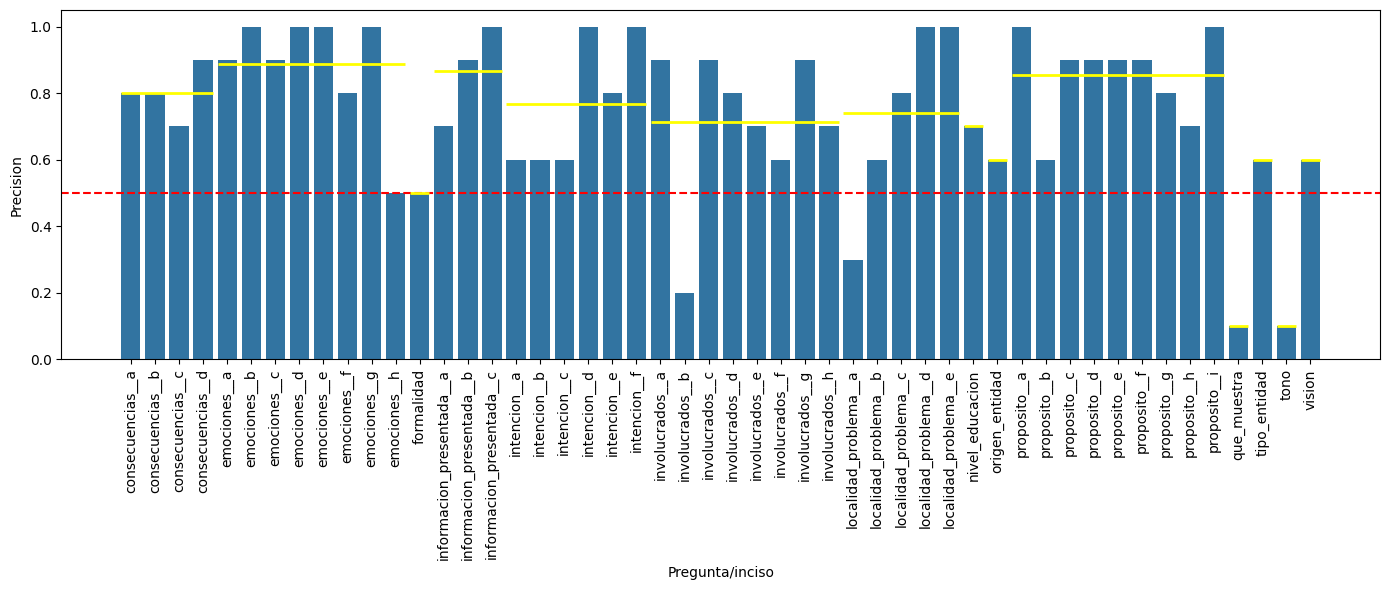

In [19]:
plot_df = df_sorted_page.reset_index(drop=False).copy()
plot_df["pregunta"] = plot_df["item_key"].map(get_group)

order = sorted(plot_df["item_key"].unique())  # alfabético

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=plot_df,
    x="item_key",
    y="igual",
    order=order,
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.axhline(0.5, ls="--", color="red")

# Mapa etiqueta -> posición (0..n-1) según el order del plot
pos = {k: i for i, k in enumerate(order)}

for g, subg in plot_df.groupby("pregunta", sort=False):
    xs = [pos[k] for k in subg["item_key"] if k in pos]
    if not xs:
        continue

    start, end = min(xs), max(xs)

    # si quieres que NaN cuente como 0, usa fillna(0)
    y_mean = subg["igual"].mean()  # o: subg["igual"].fillna(0).mean()

    ax.hlines(
        y=y_mean,
        xmin=start - 0.4,
        xmax=end + 0.4,
        colors="yellow",
        lw=2,
    )

ax.set_xlabel("Pregunta/inciso")
ax.set_ylabel("Precision")
plt.tight_layout()
plt.show()


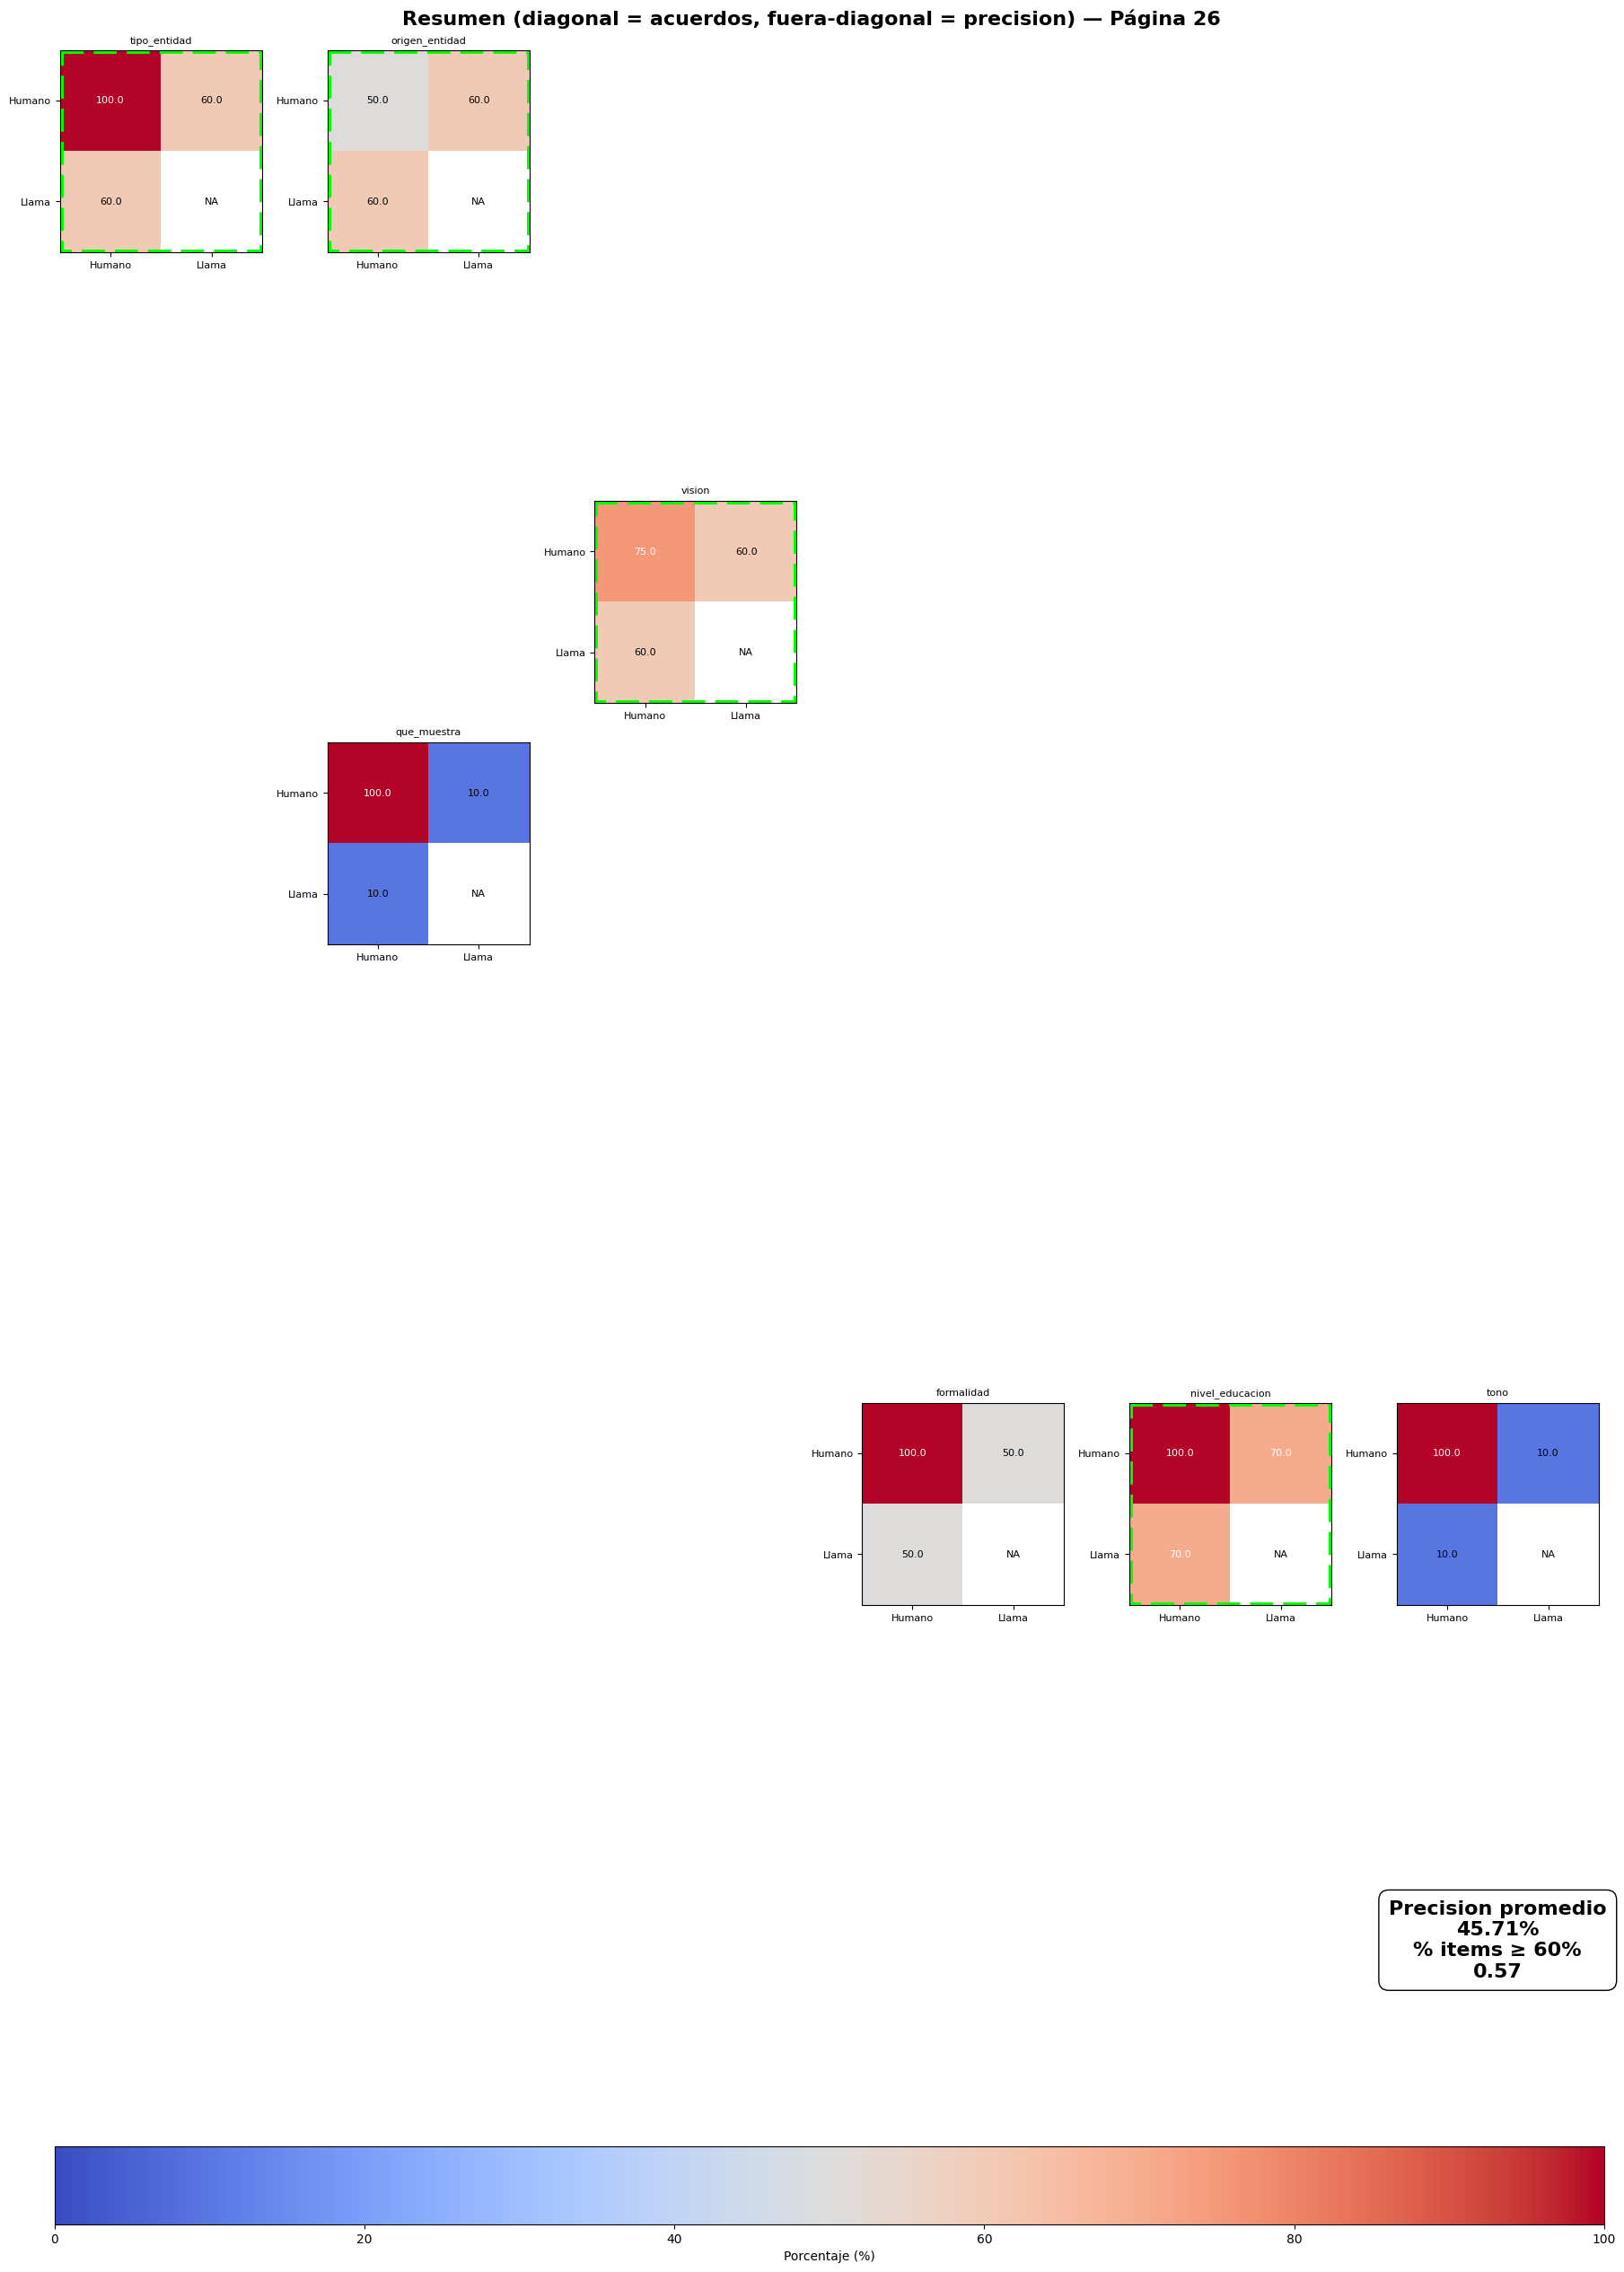

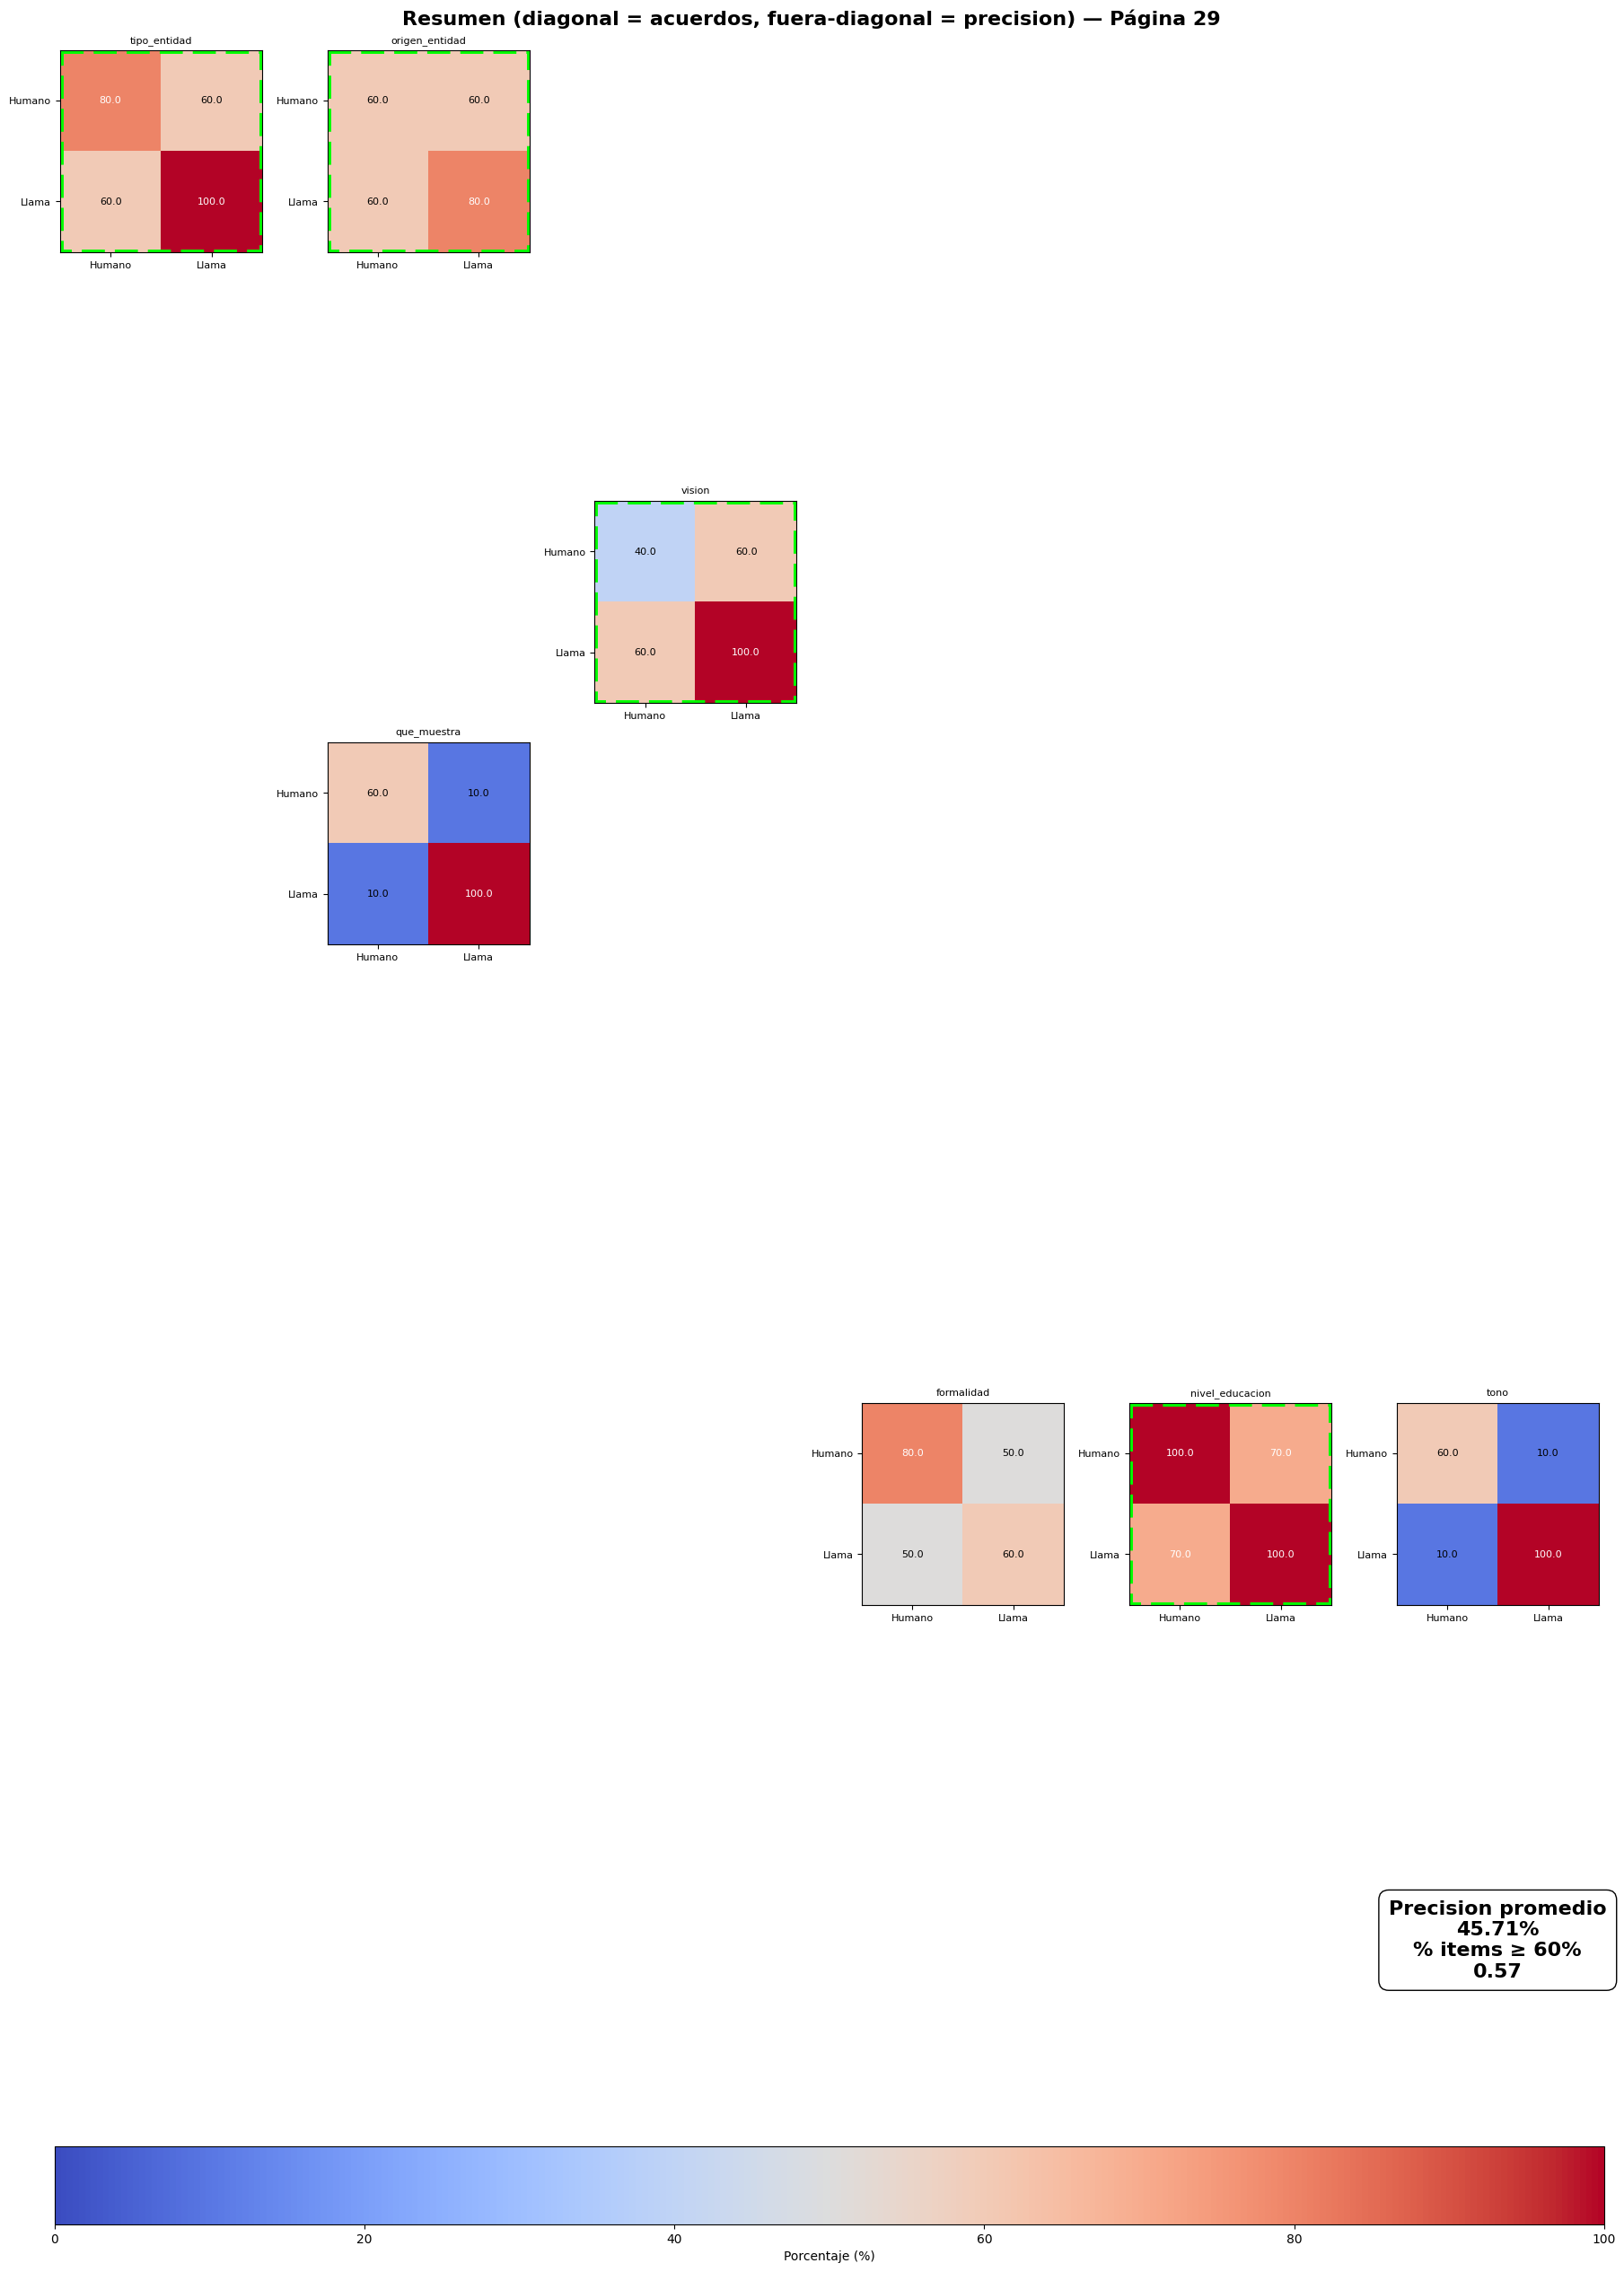

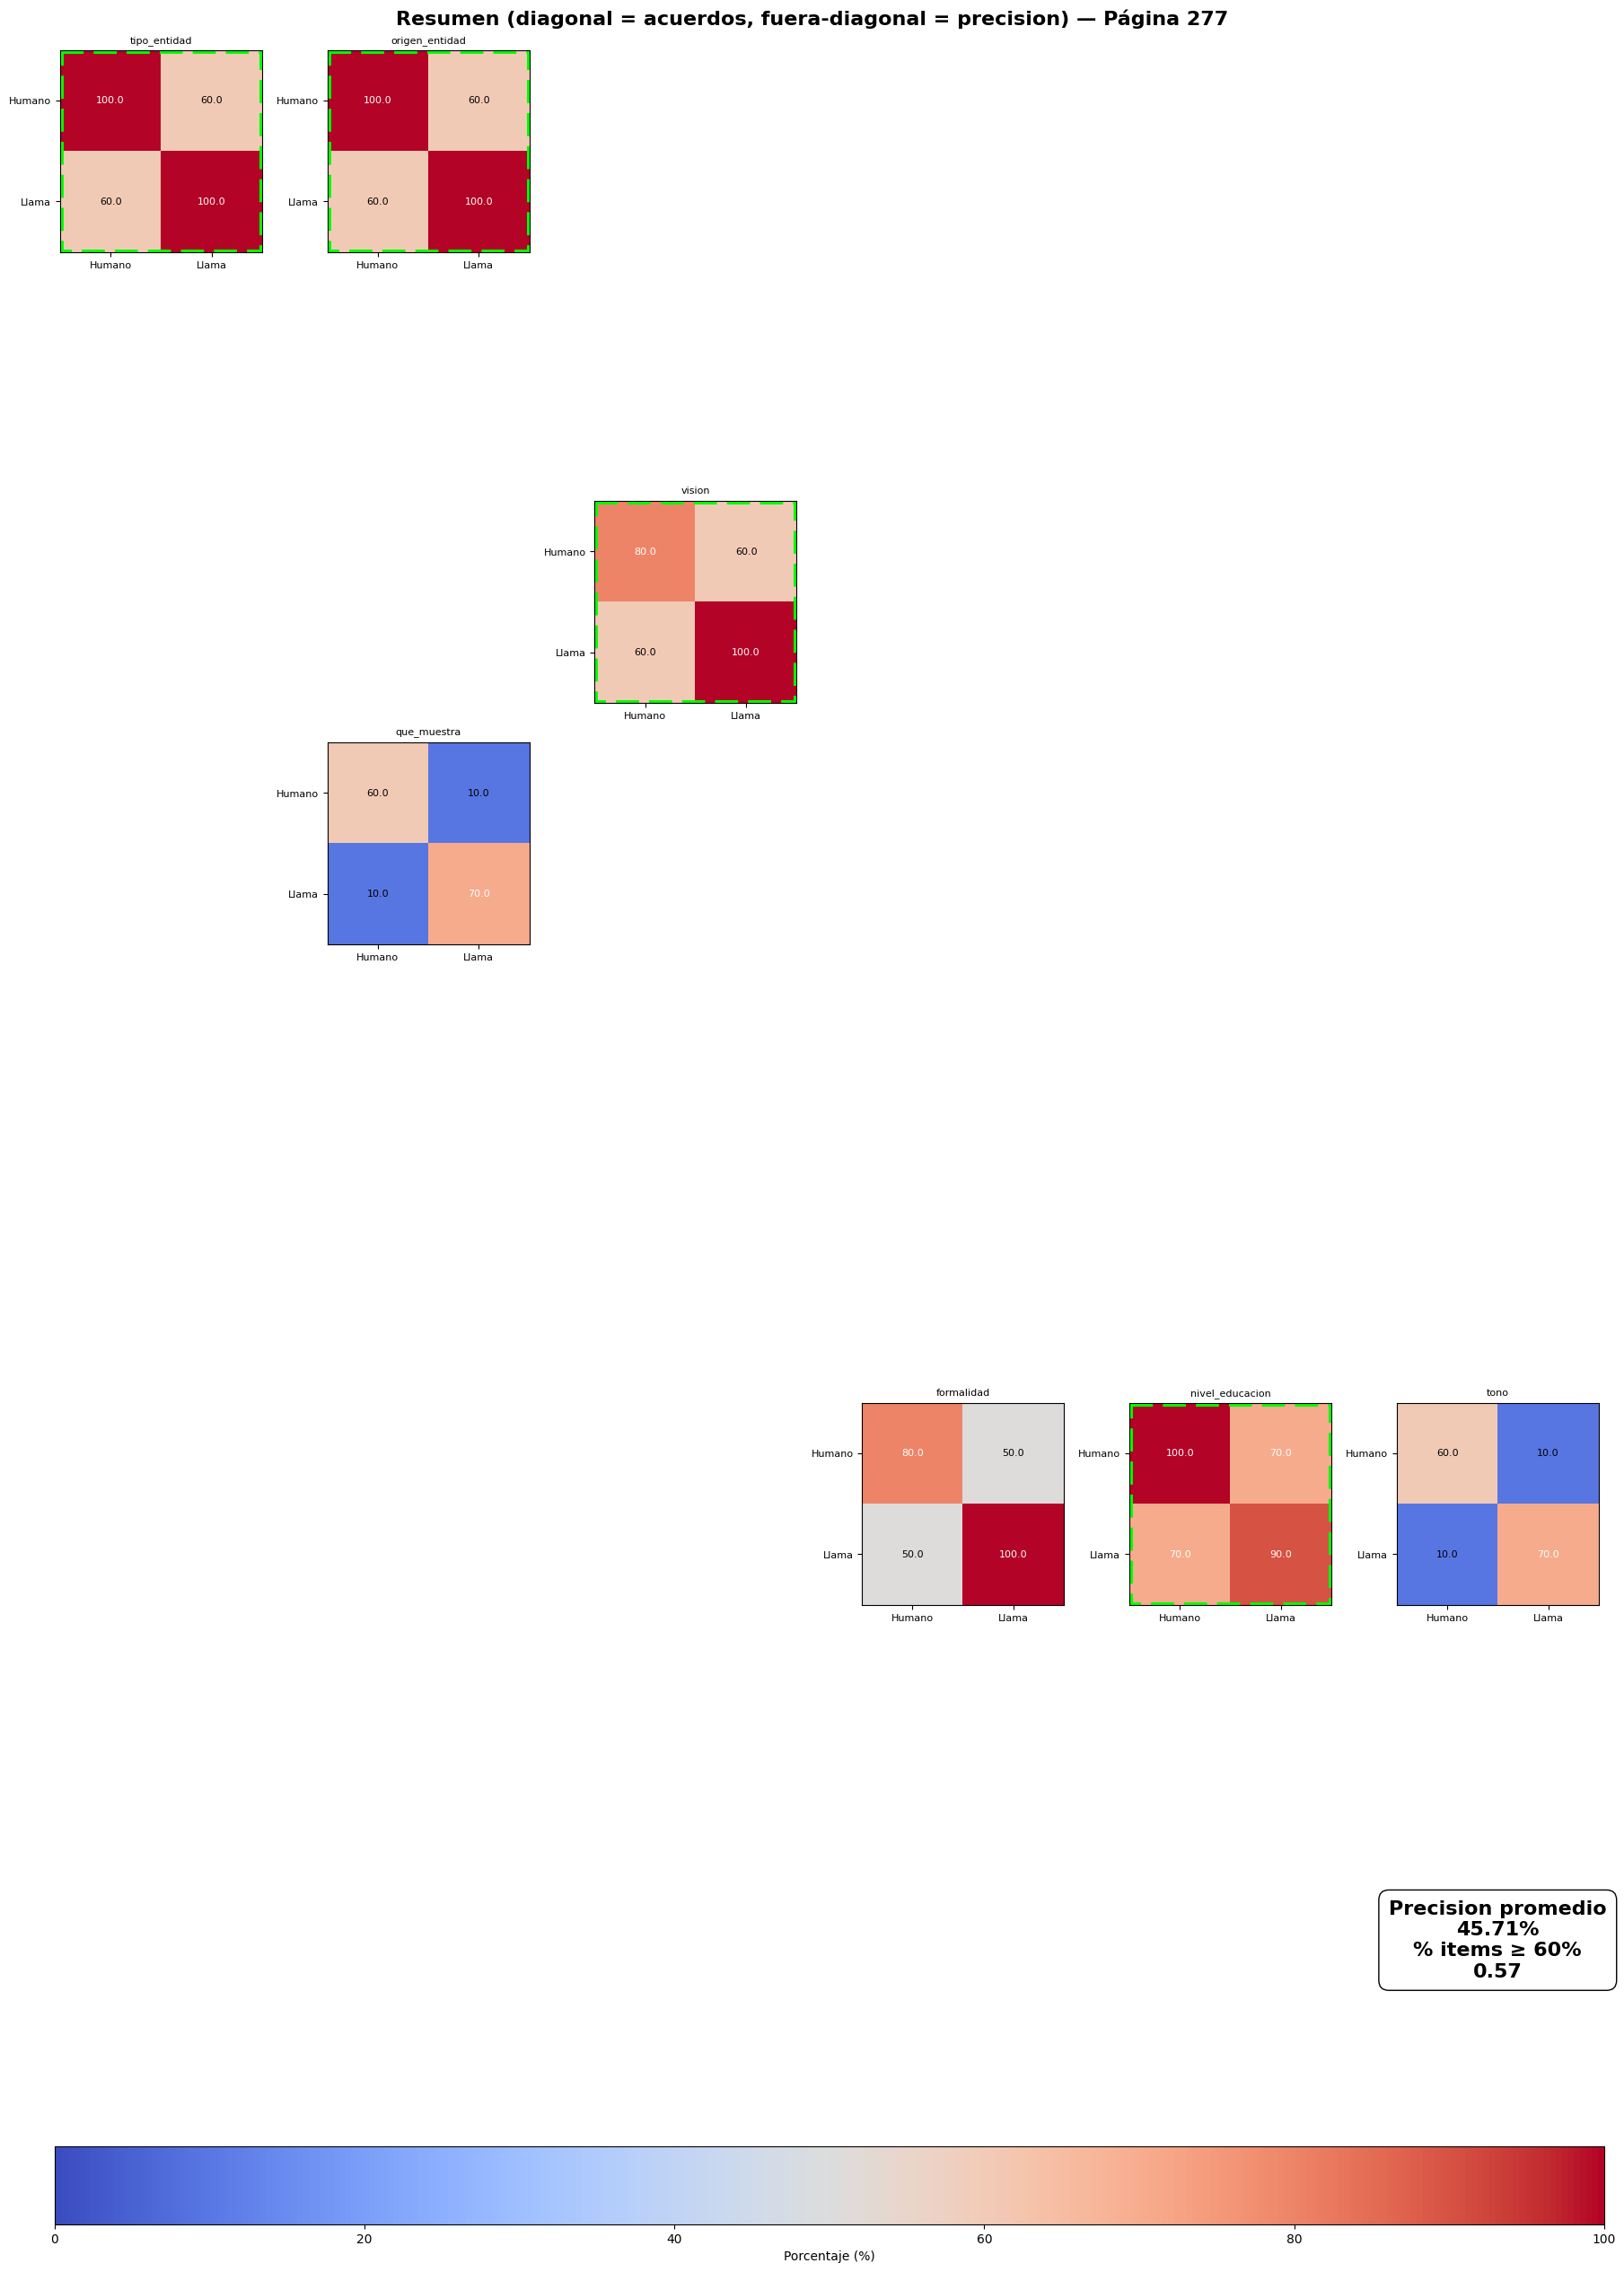

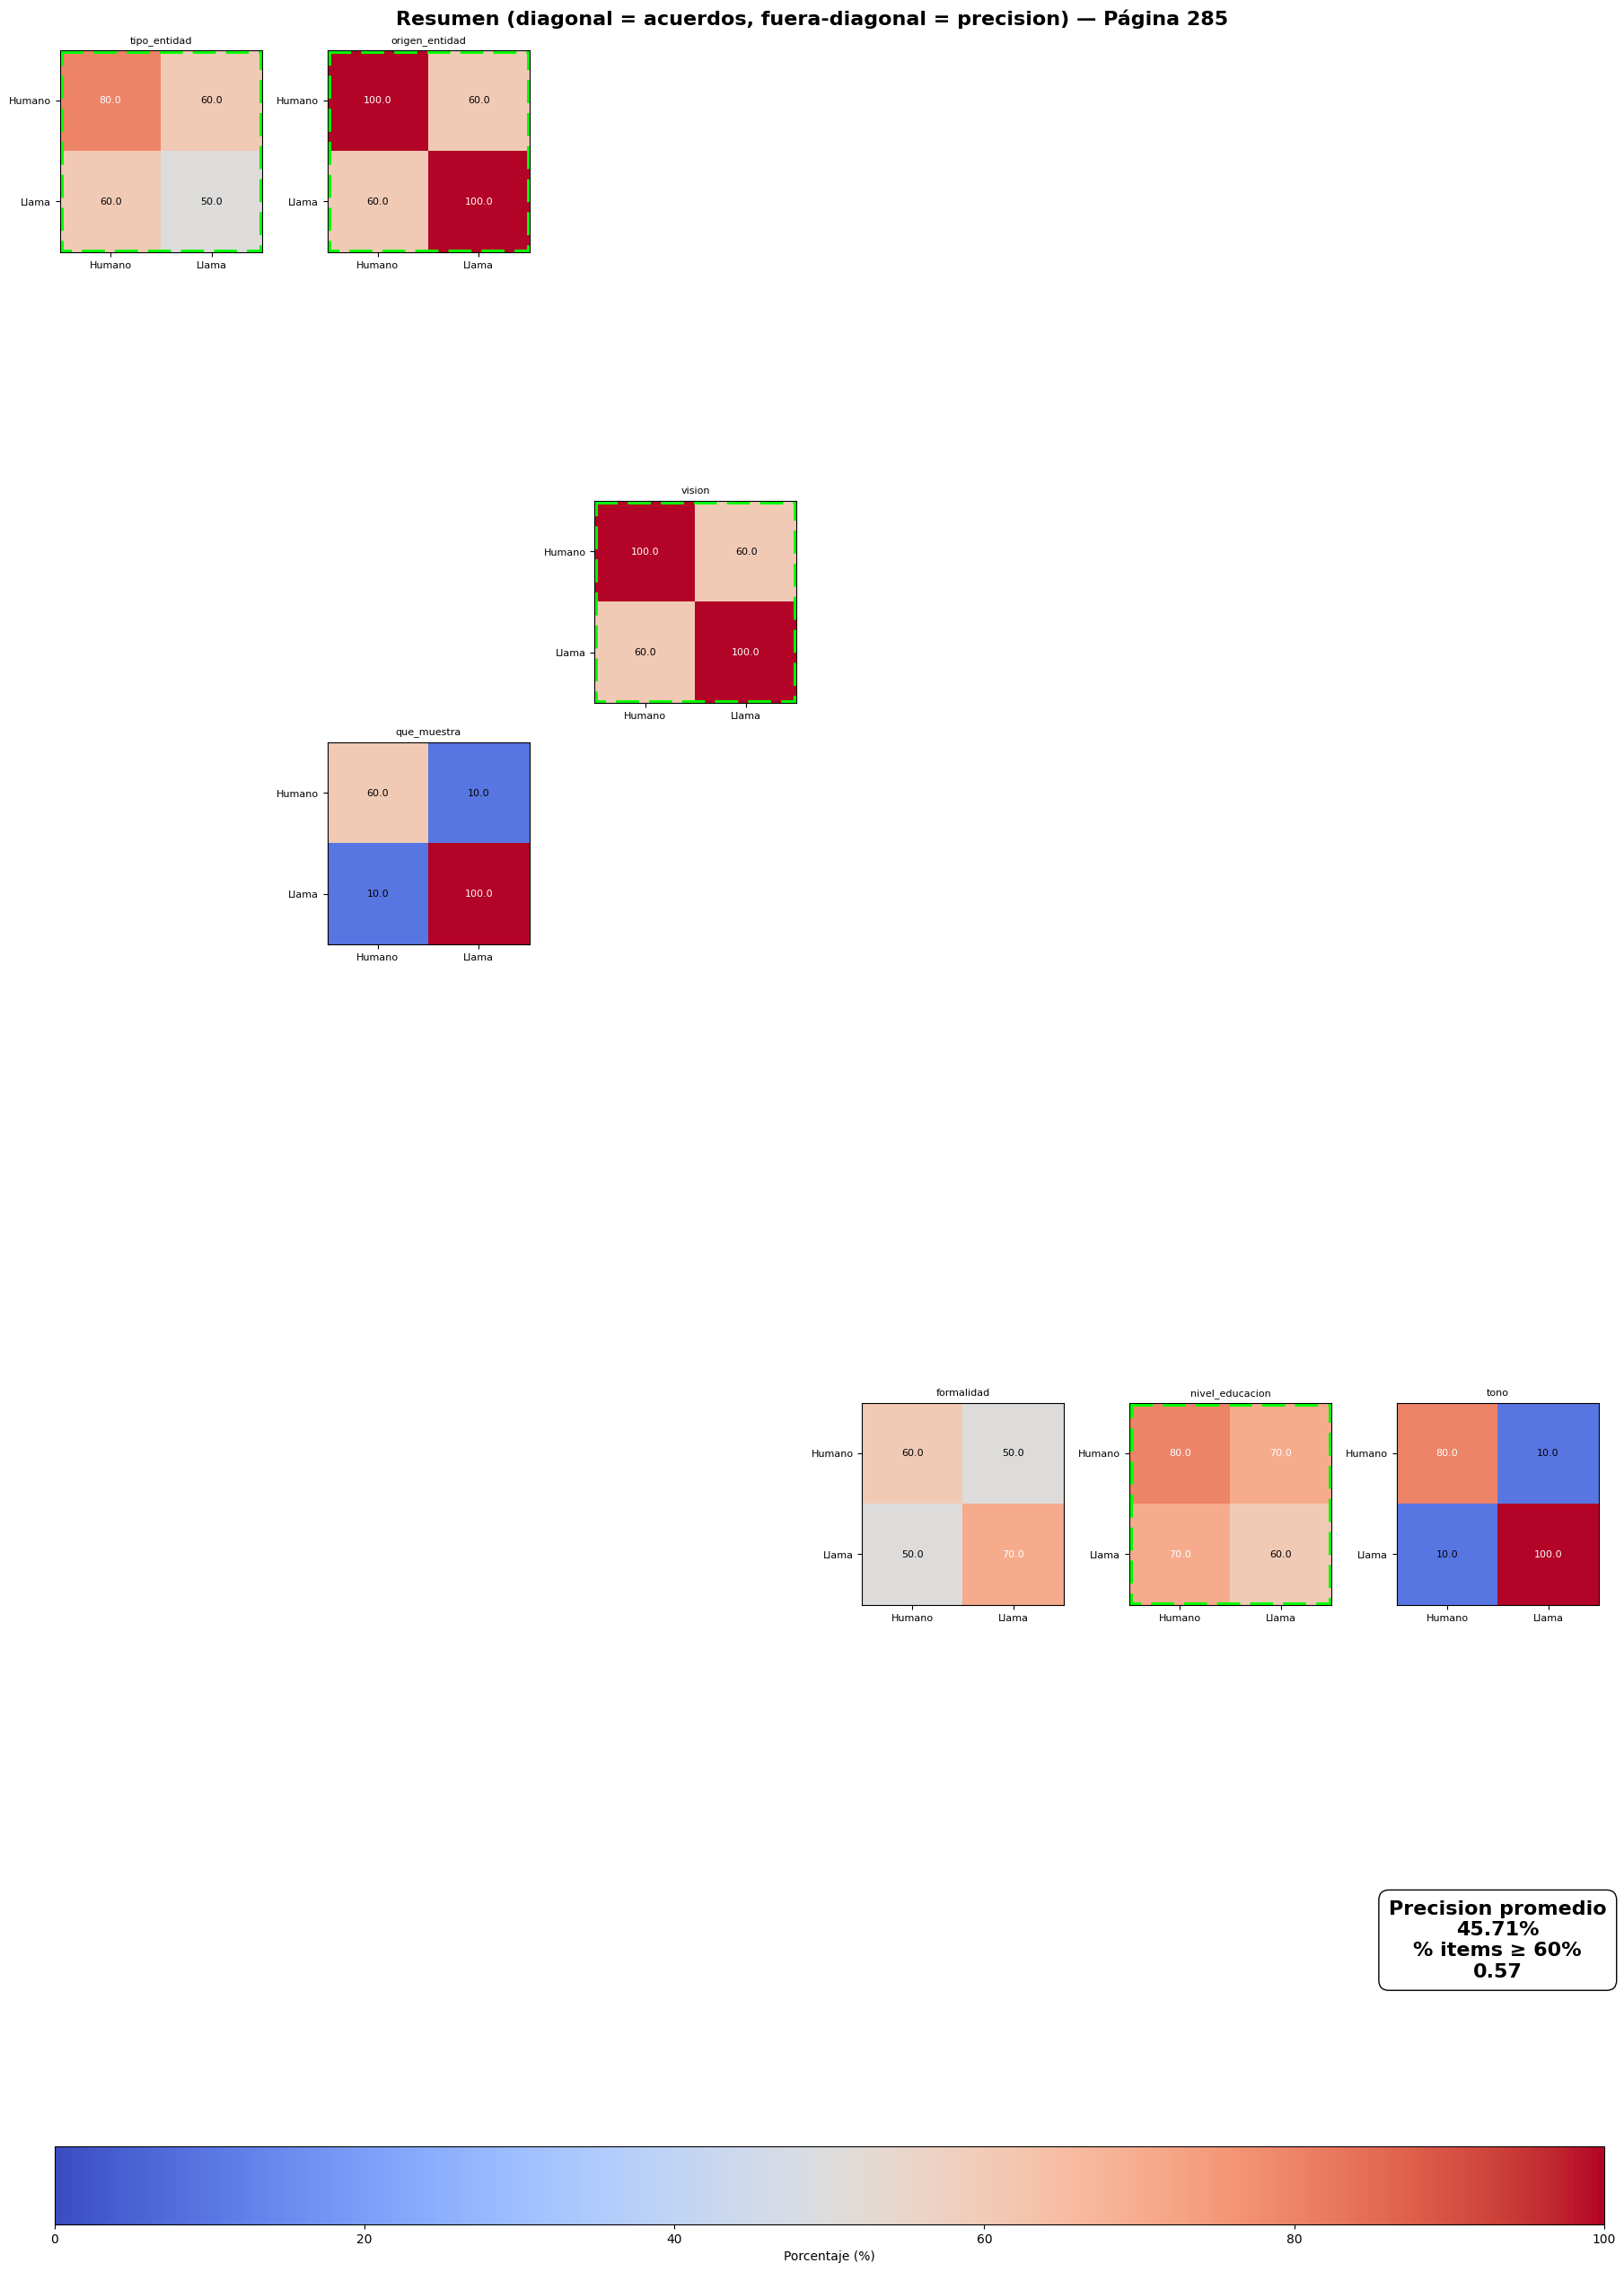

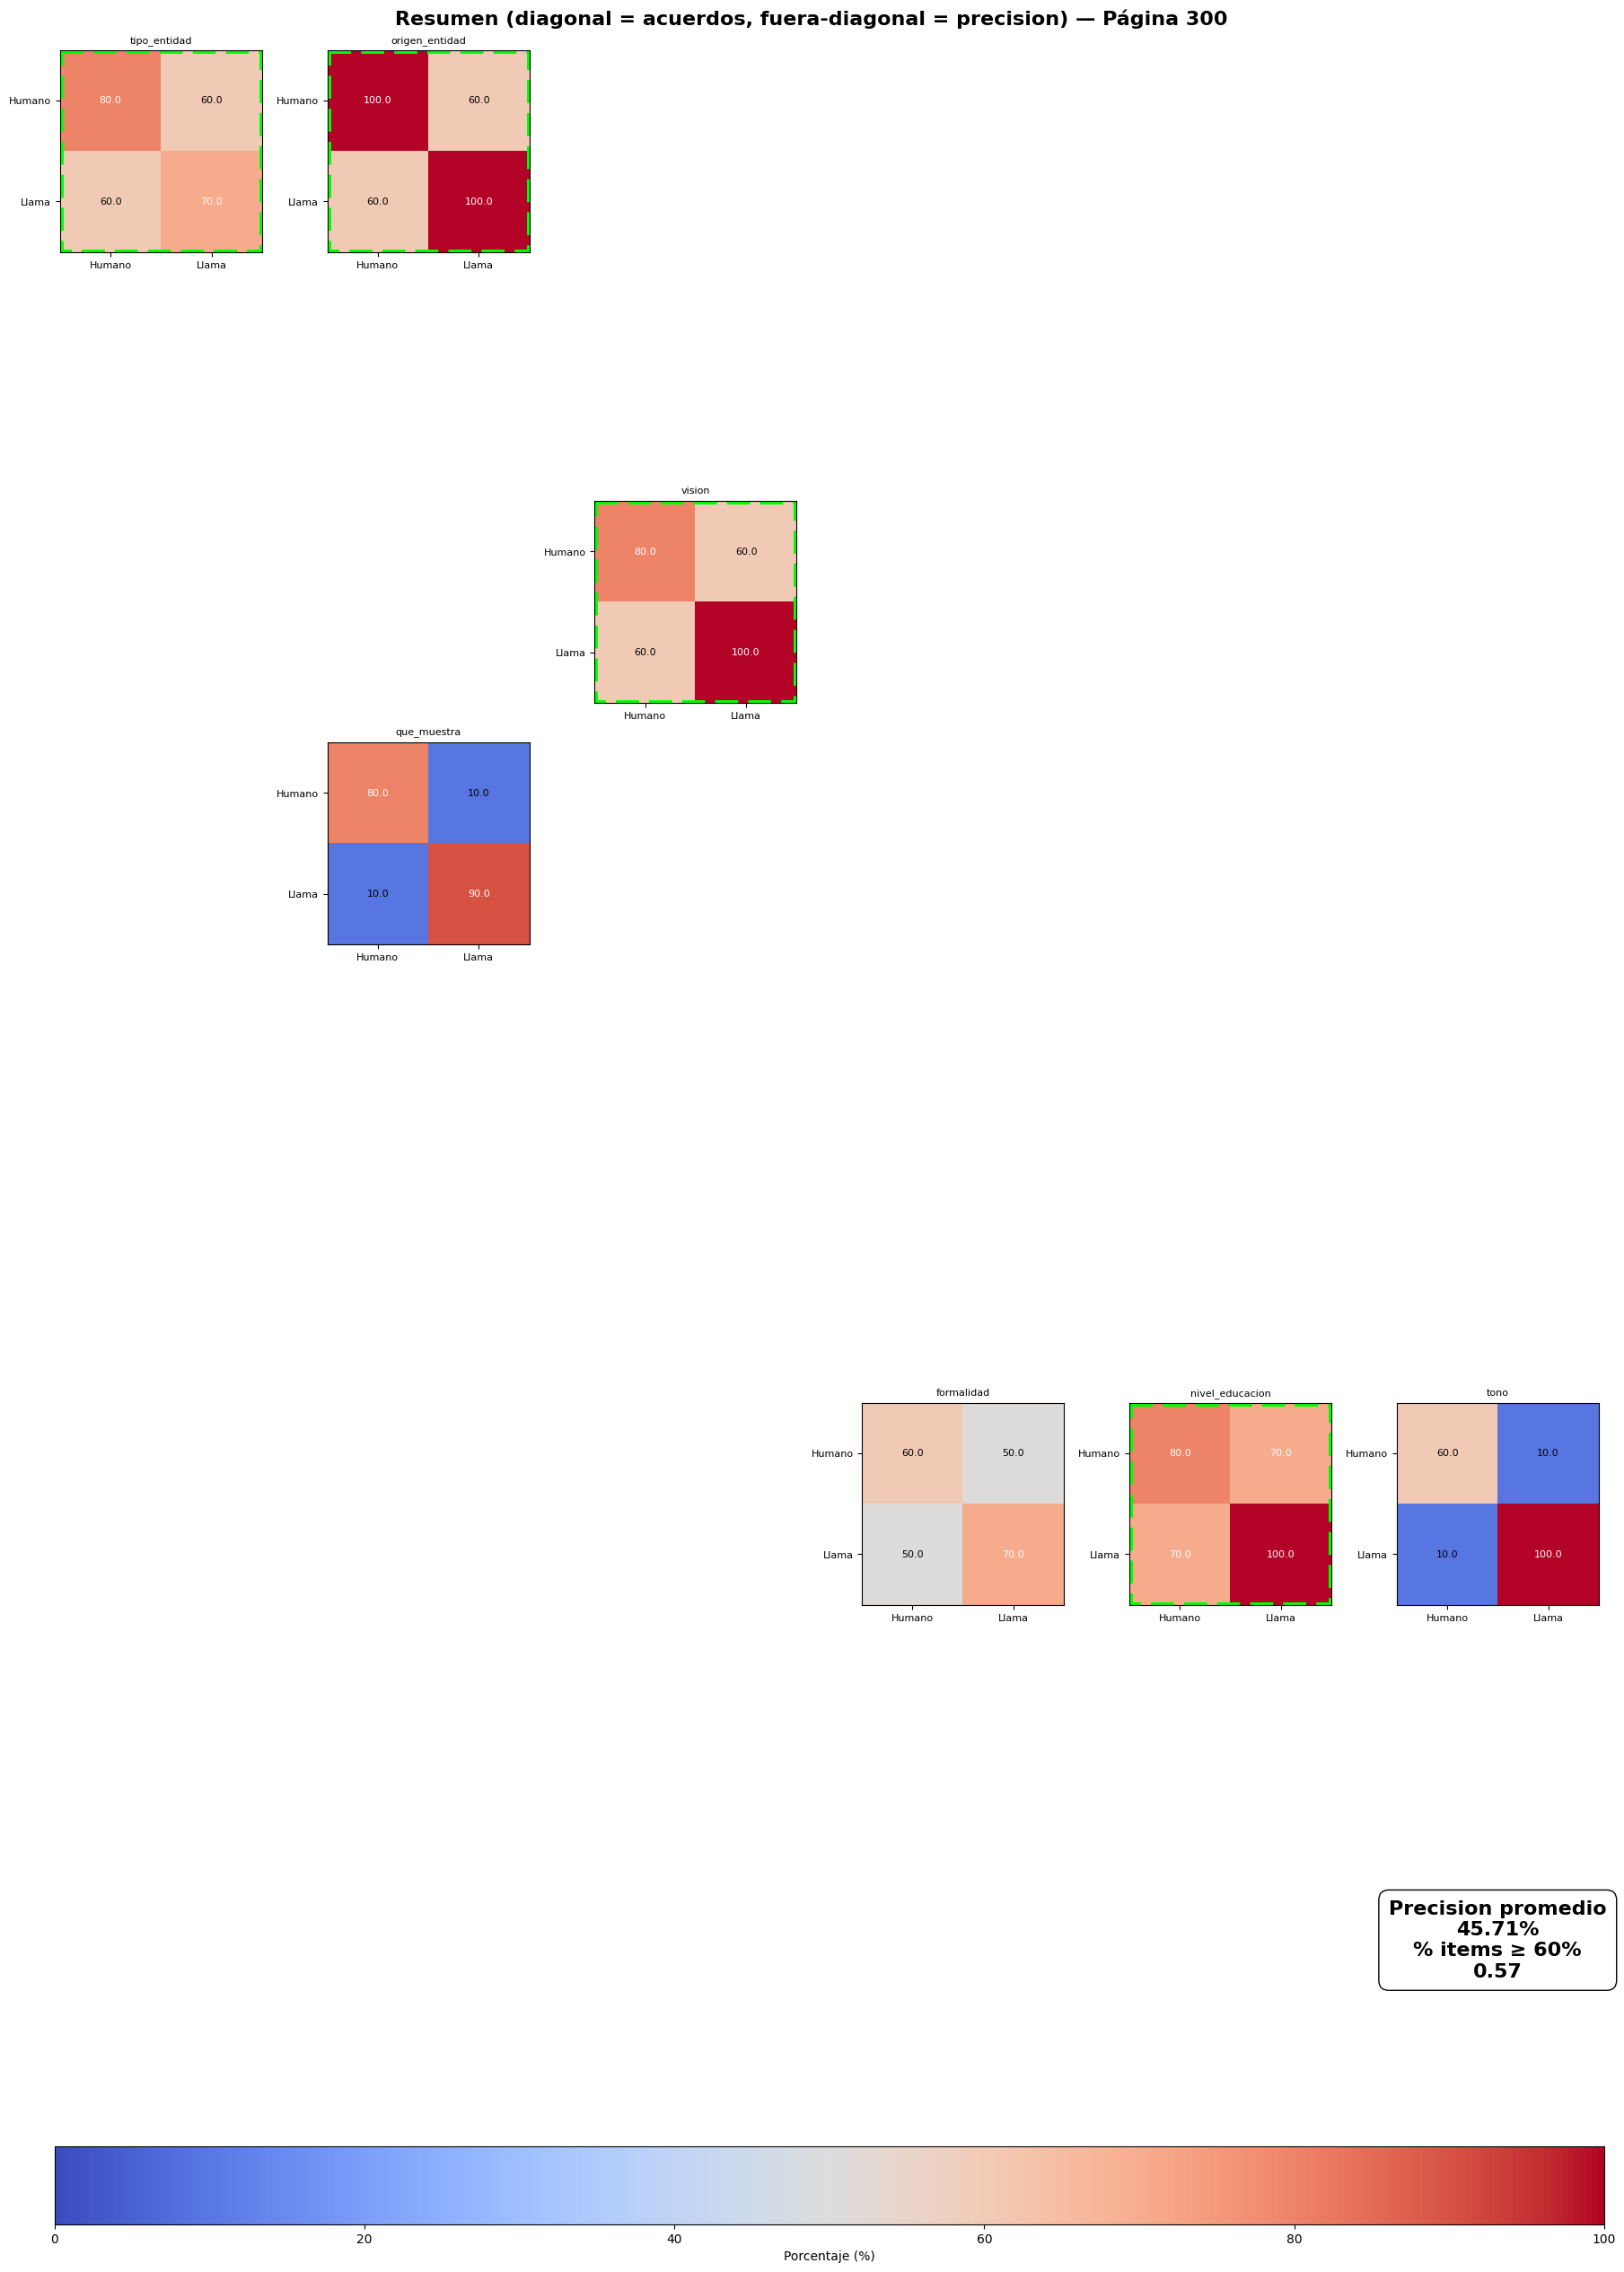

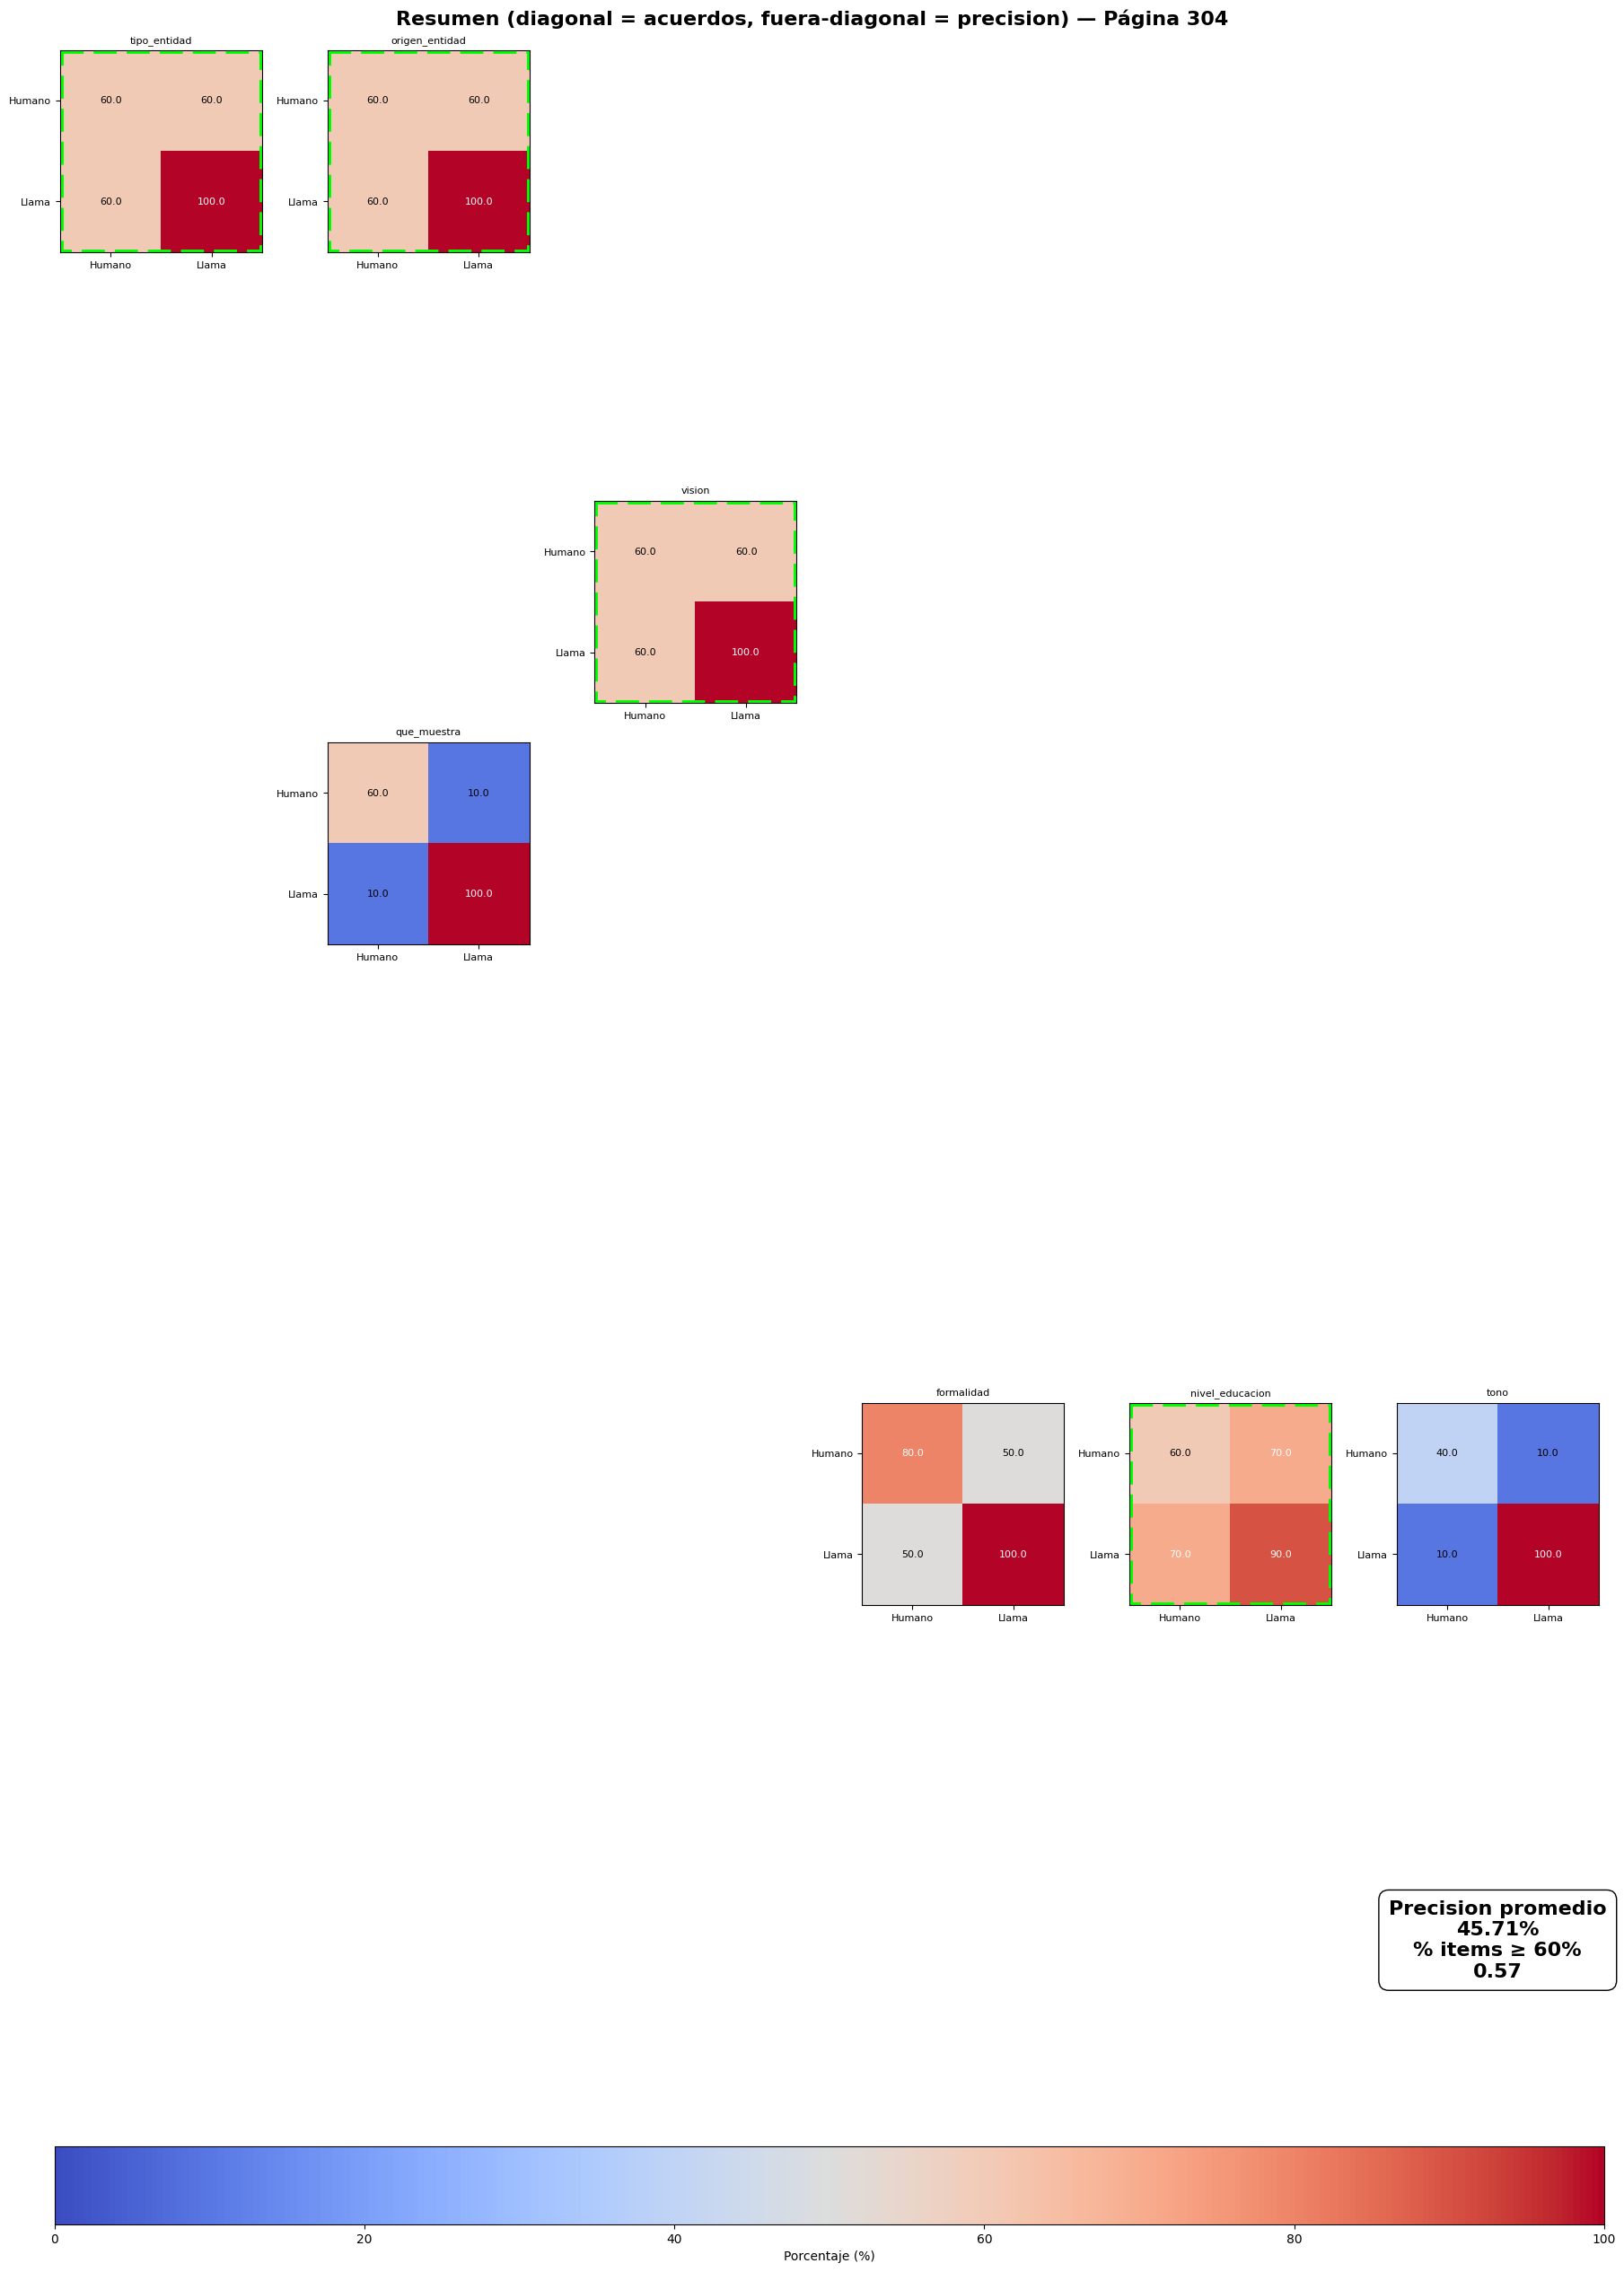

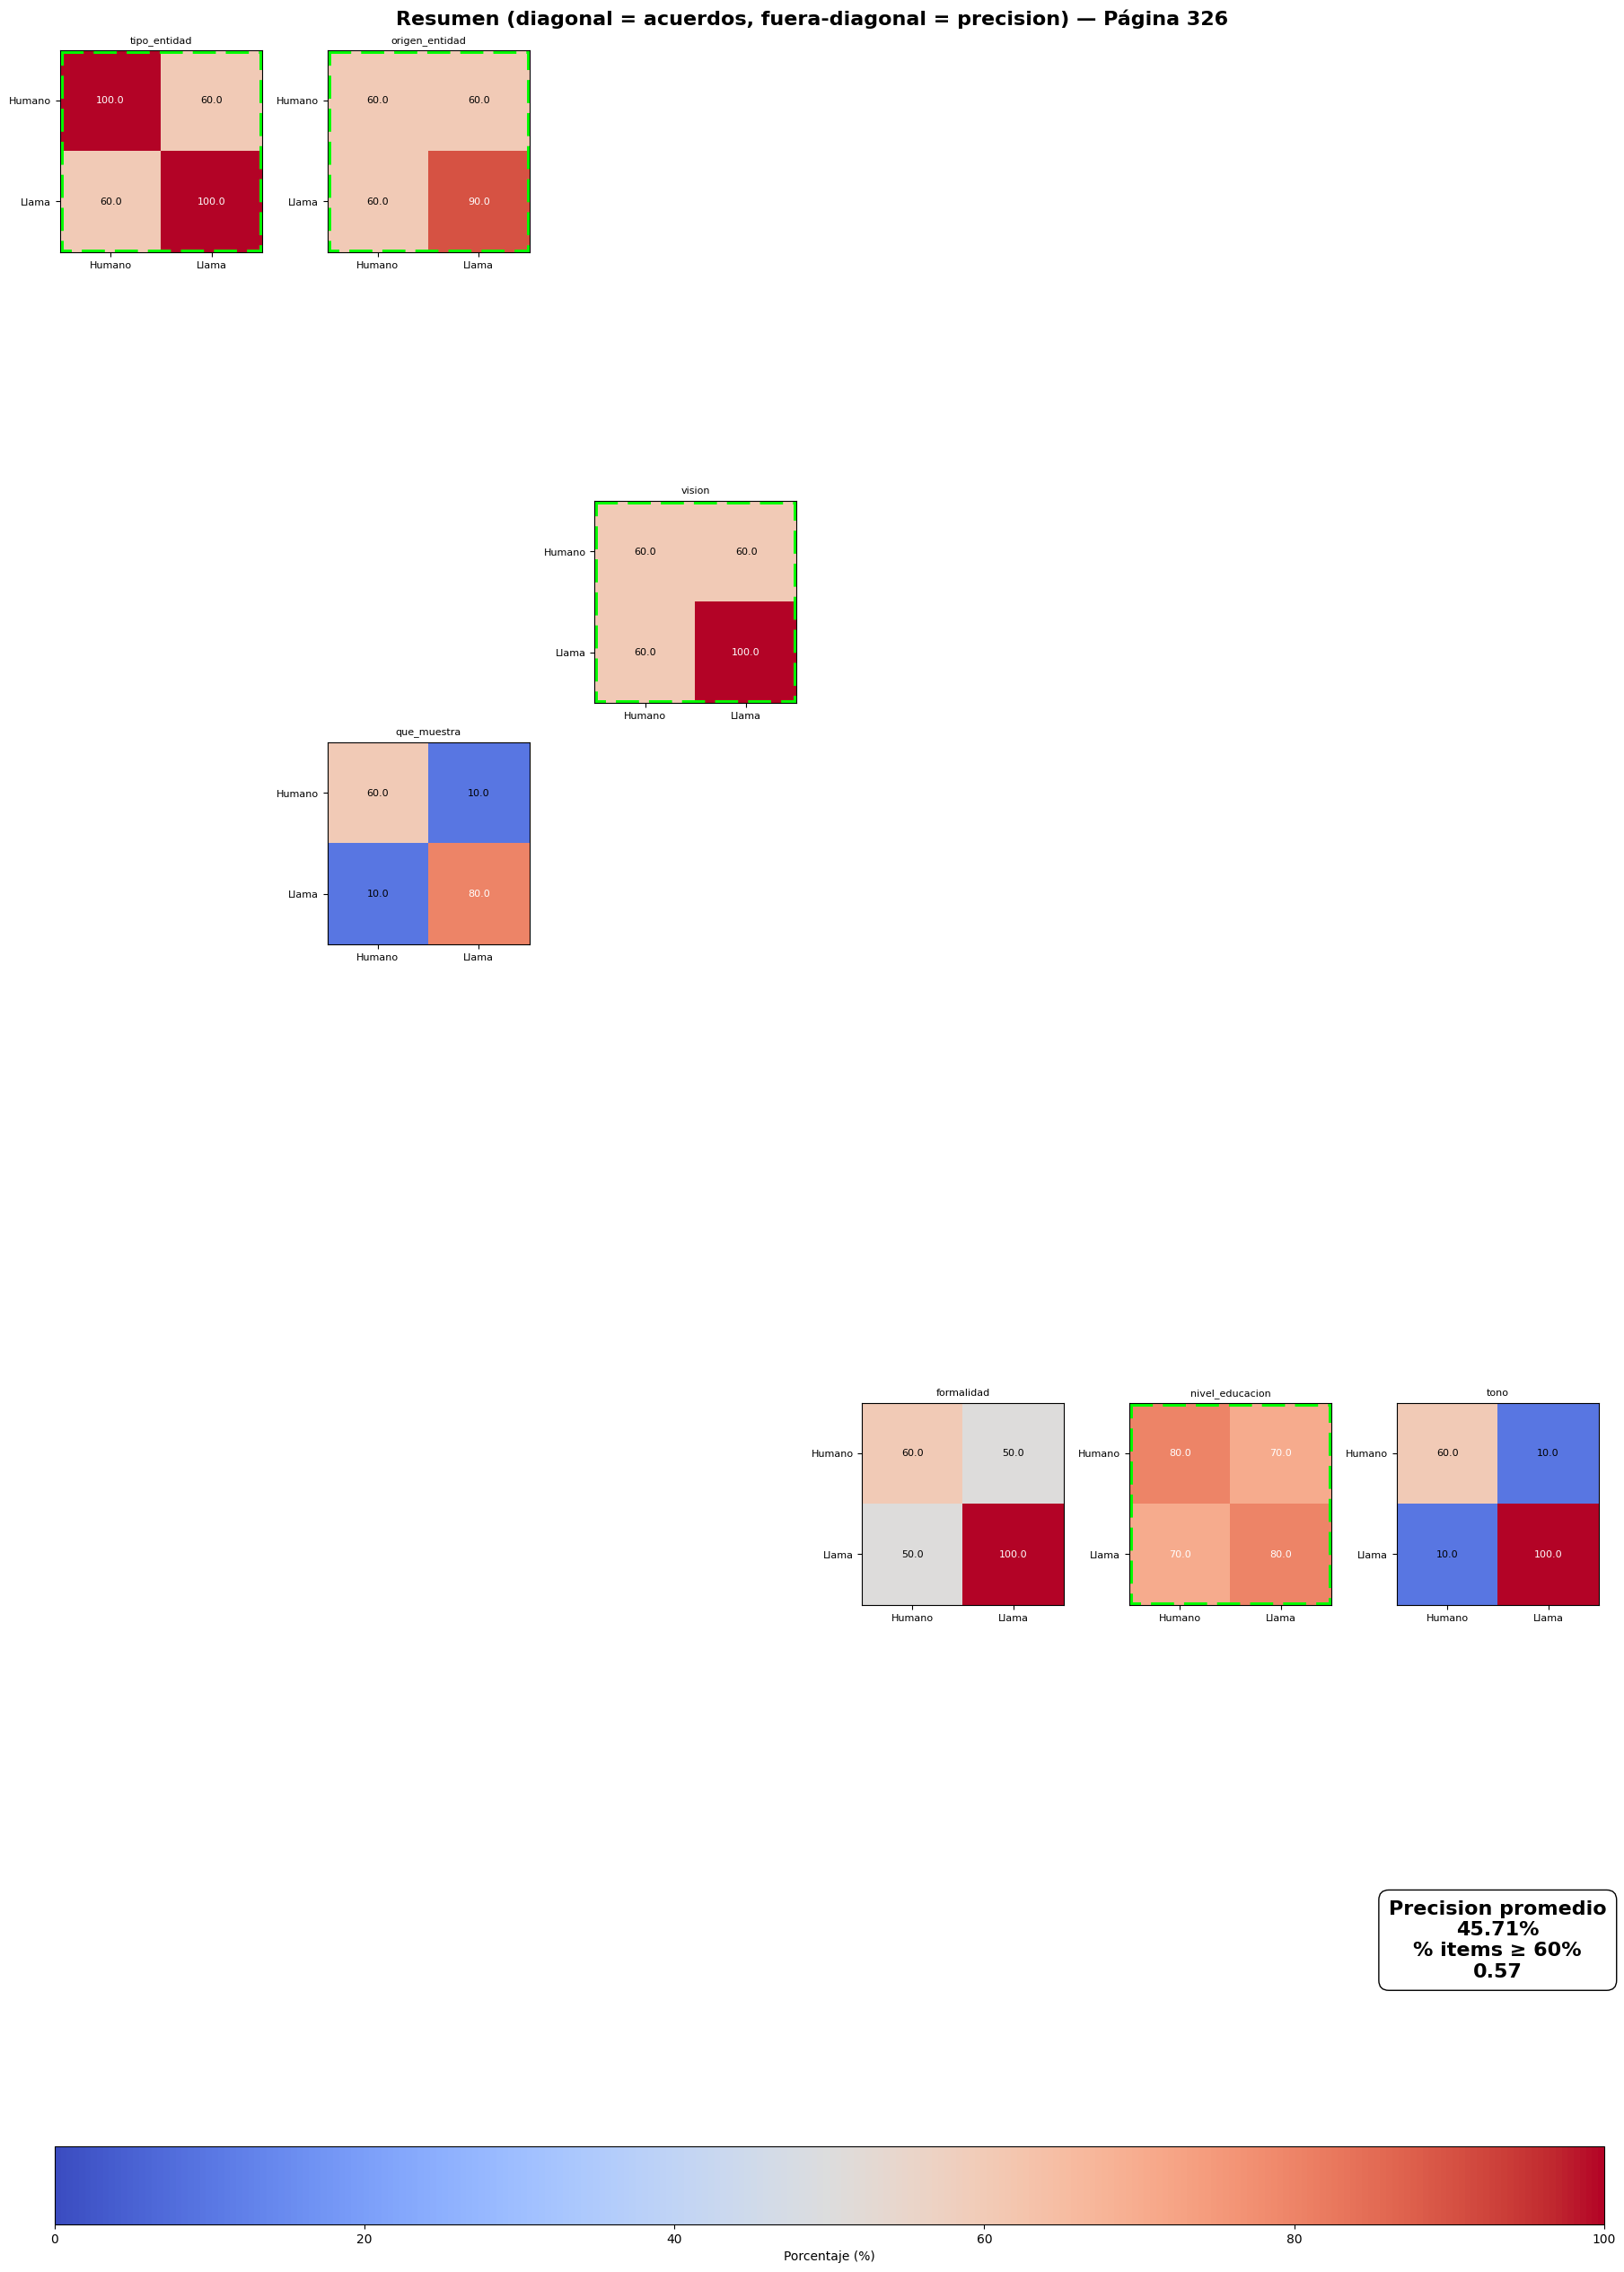

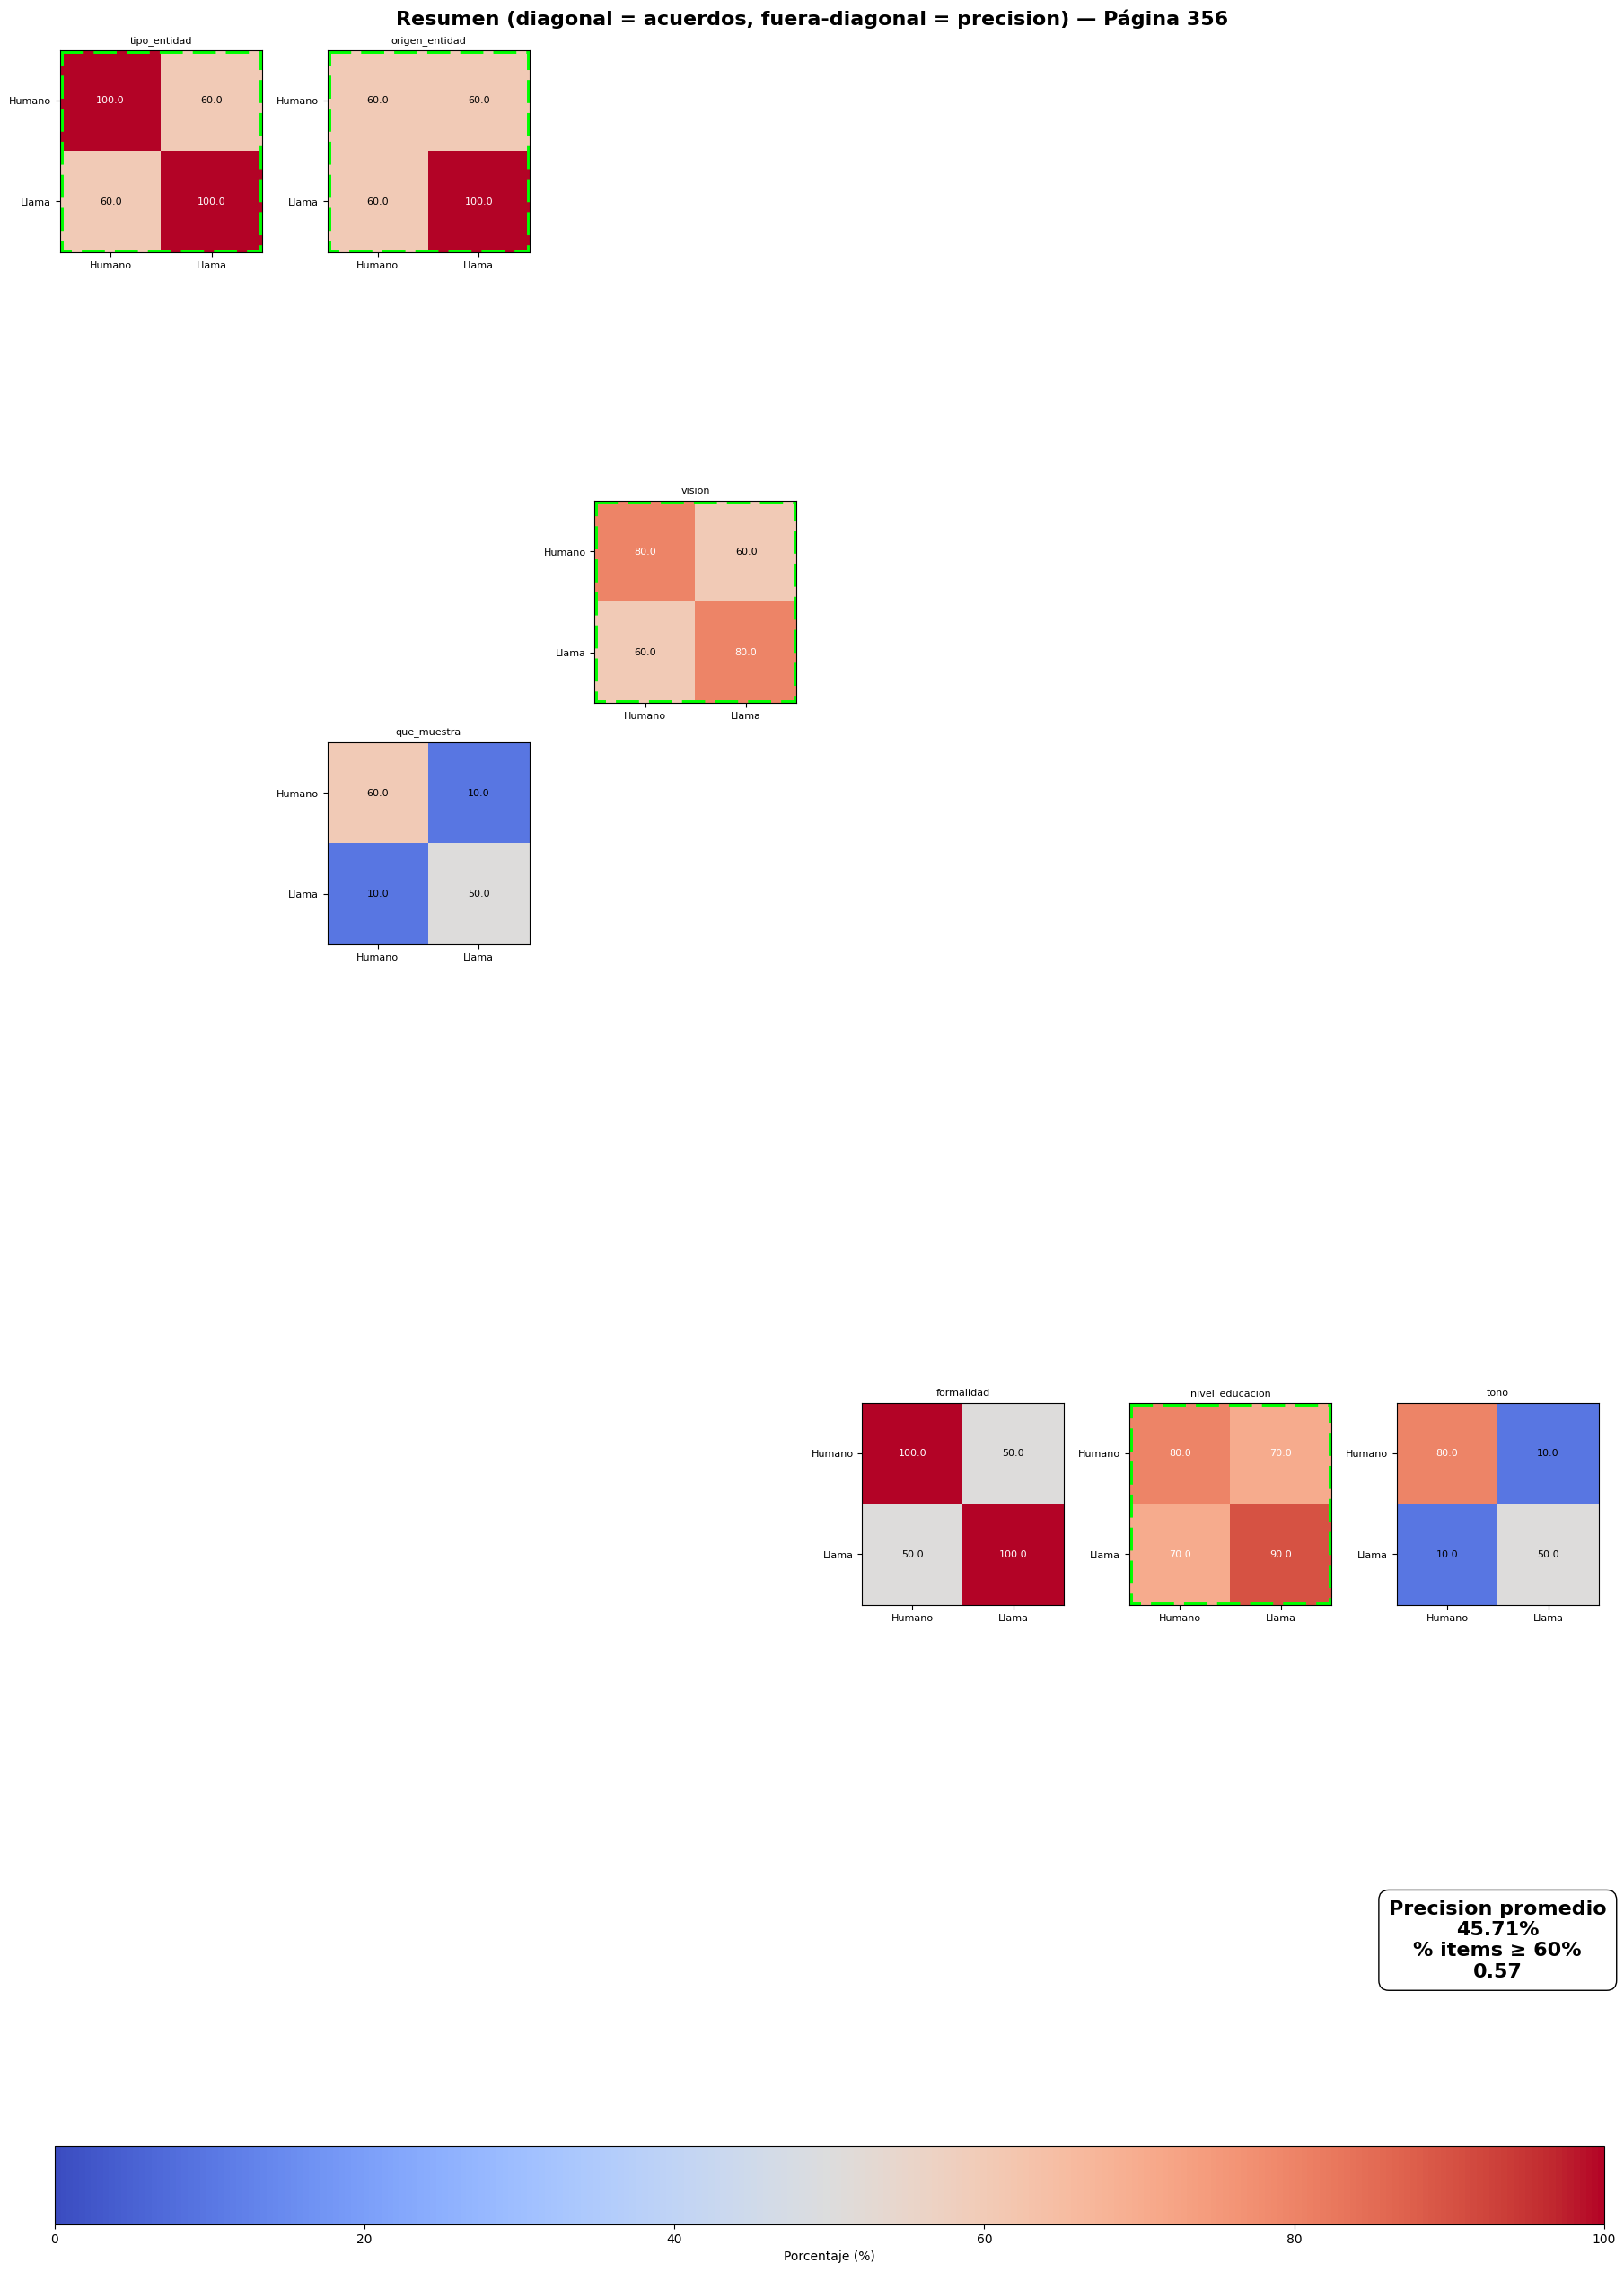

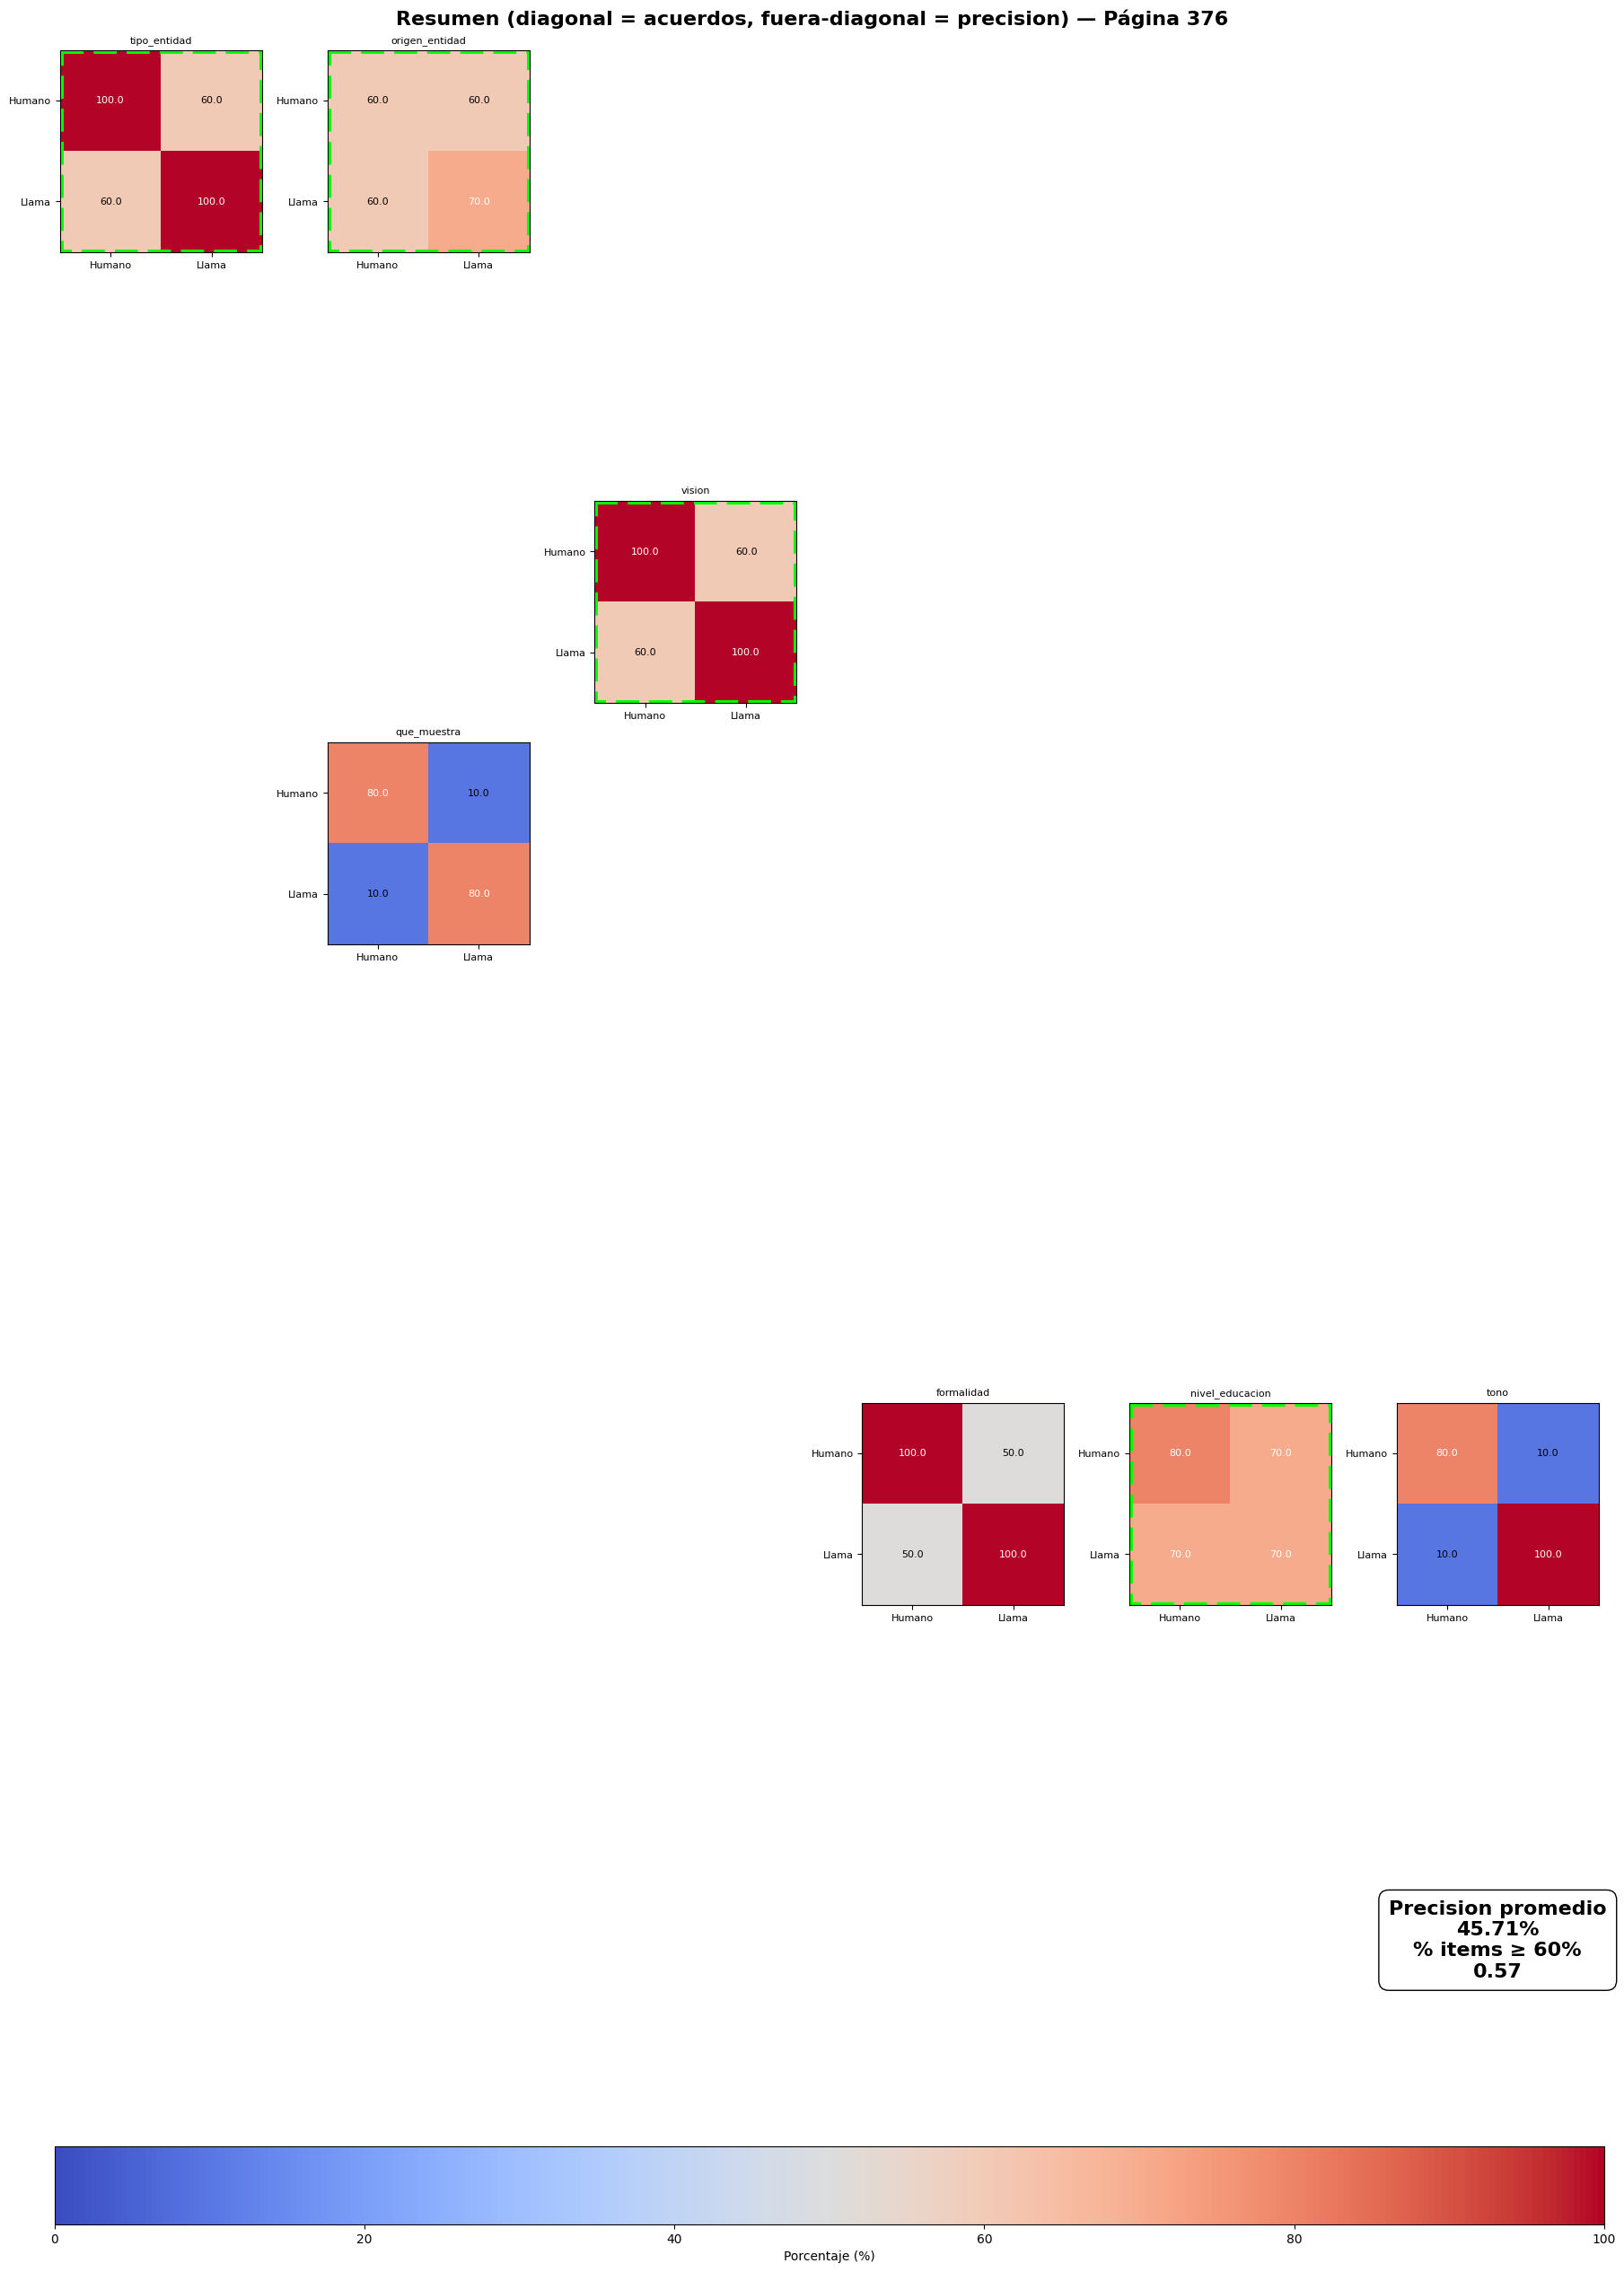

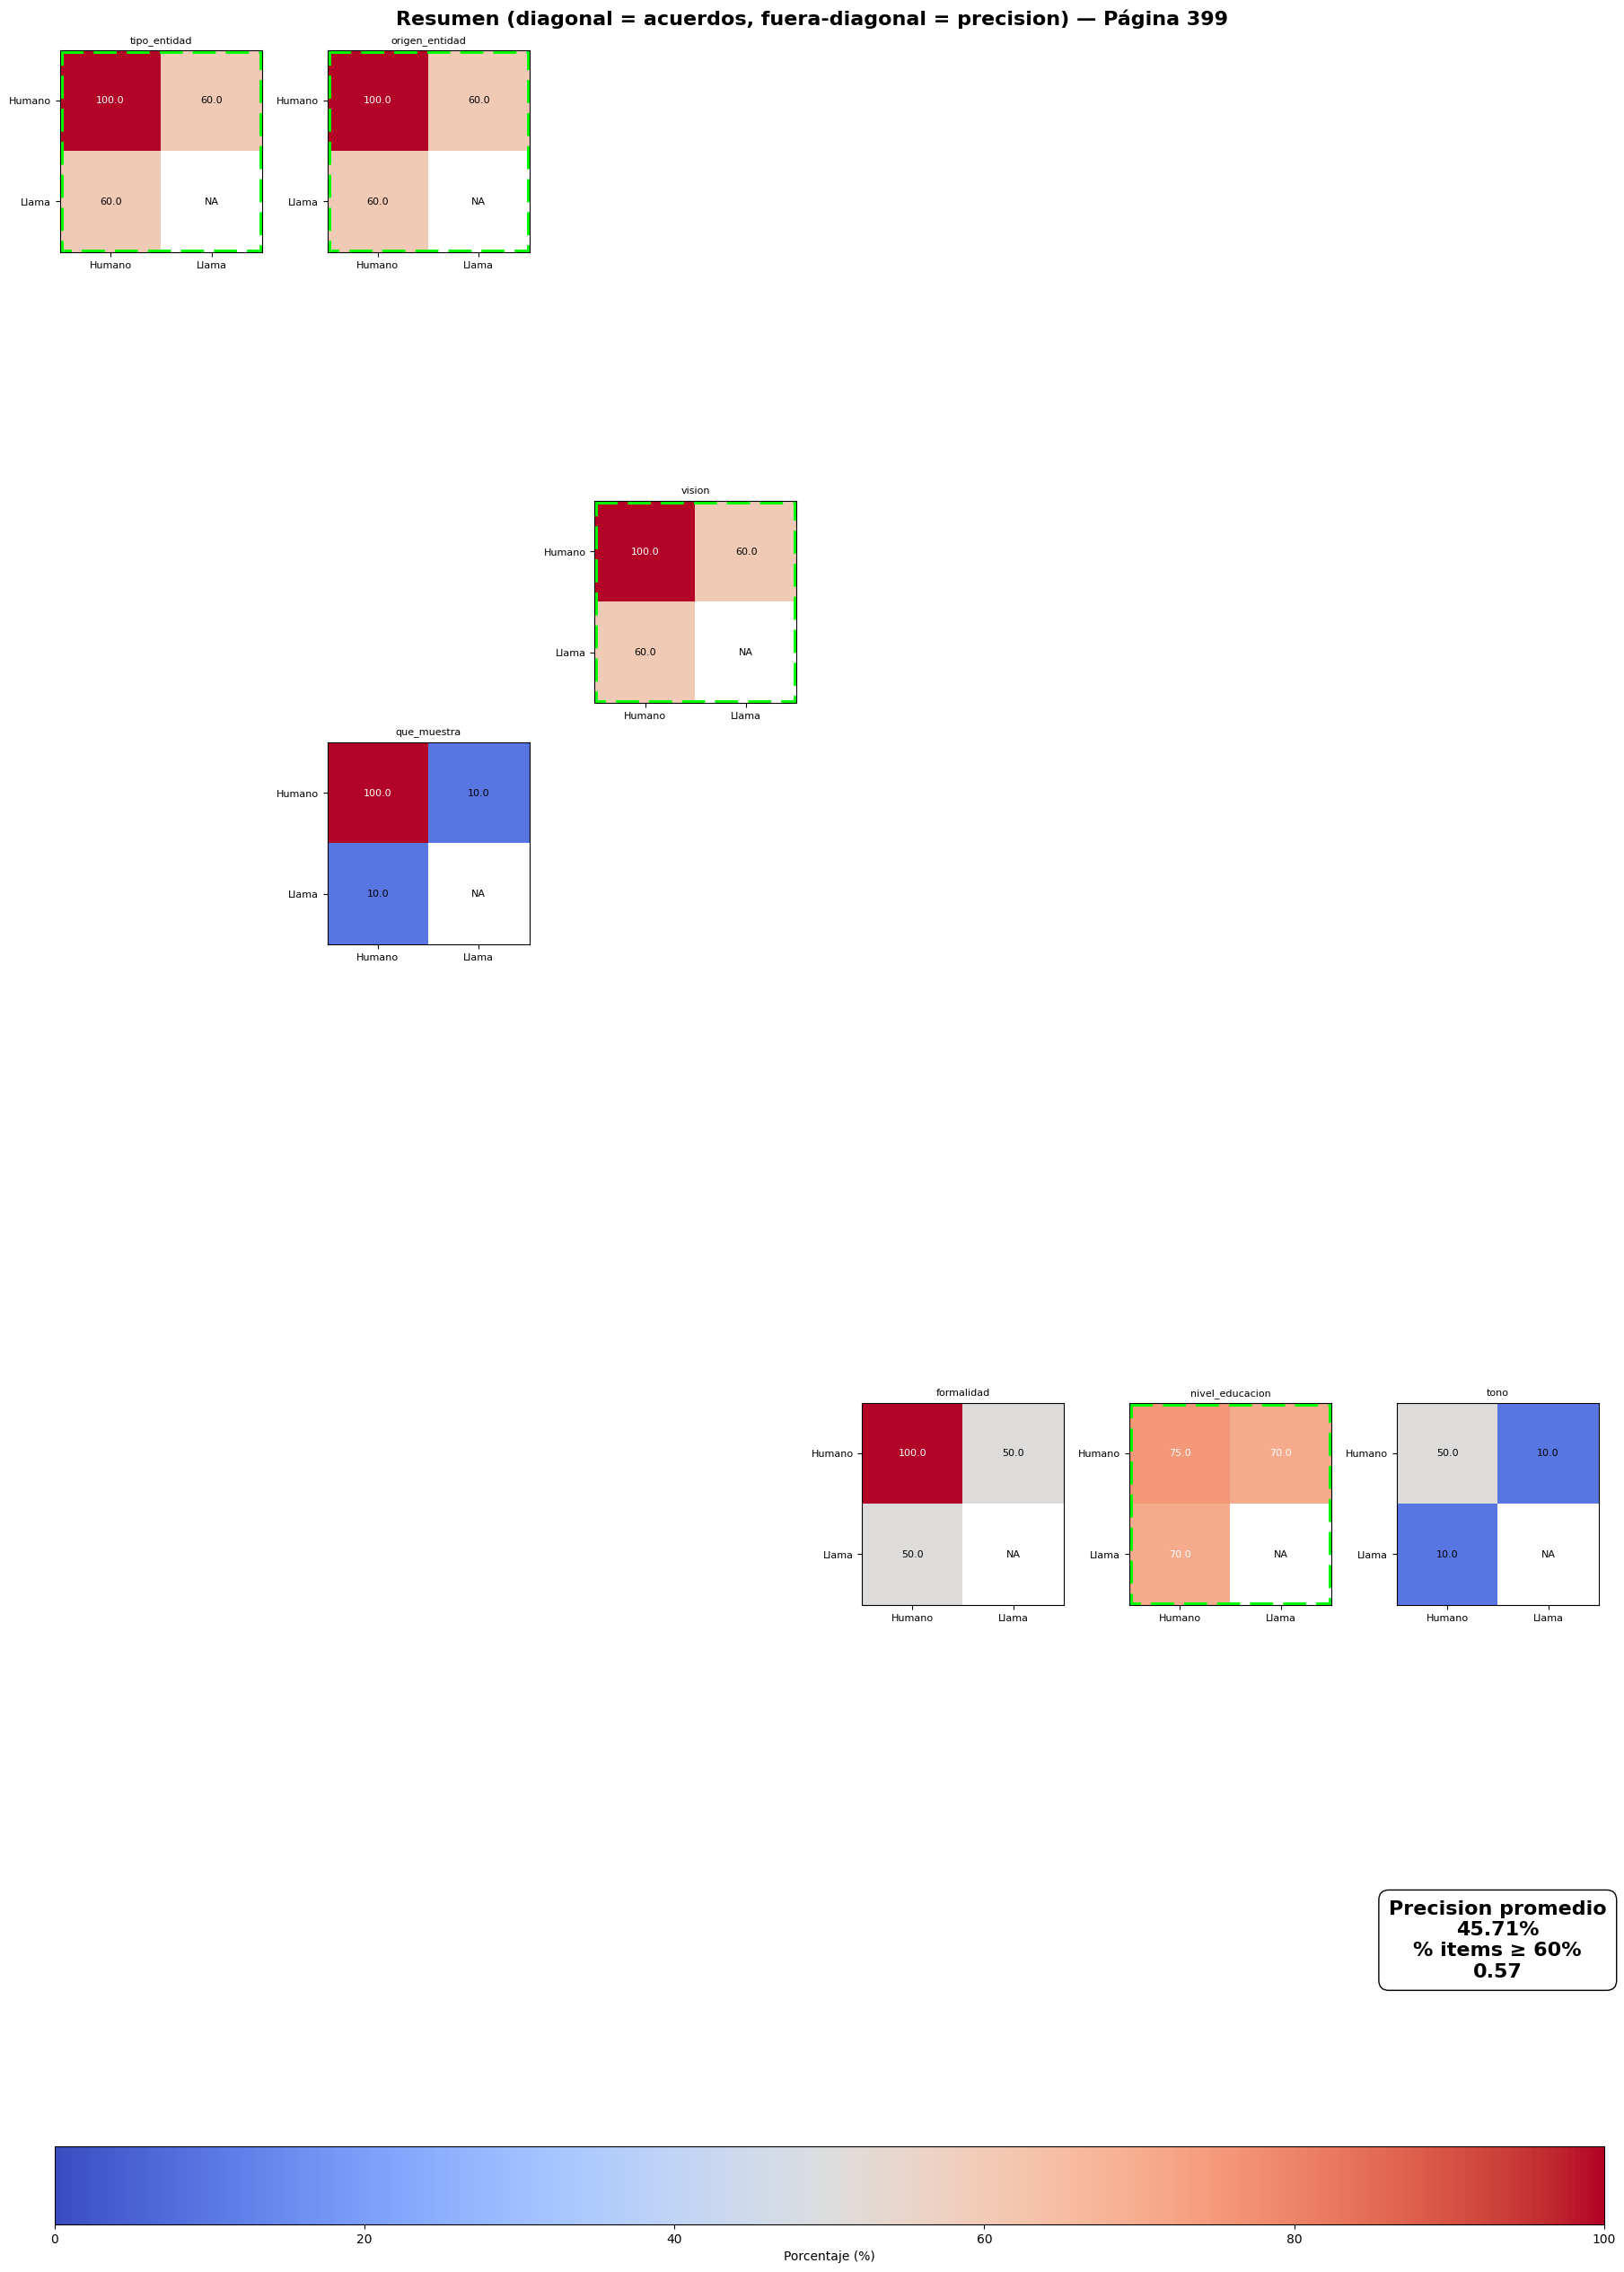

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from matplotlib.patches import Rectangle

# -----------------------------
# Config
# -----------------------------
THR_PREC = 60.0
CMAP = "coolwarm"
VMIN, VMAX = 0, 100

# -----------------------------
# 1) Construir lista fija de items y títulos
# -----------------------------
items = []
title_map = {}

for p in preguntas:
    if p in multi_answer:
        for inc in incisos_dicts[p].keys():
            k = f"{p}::{inc.lower()}"
            items.append(k)
            title_map[k] = f"{p}: {incisos_dicts[p].get(inc, inc)}"
    else:
        items.append(p)
        title_map[p] = p

n_items = len(items)

# -----------------------------
# 2) Precision por item: mean(bool)*100 a nivel global
# -----------------------------
# df_consensos_items debe tener: item_key, igual (bool)
prec_by_item = (
    df_consensos_items
    .groupby("item_key")["igual"]
    .mean()
    .astype(float)
    .mul(100.0)
)

# -----------------------------
# 3) Graficar por página
# -----------------------------
plt.rcParams.update({"font.size": 10})

pags = sorted(df_consensos_items["pagina"].unique())

for pag in pags:
    sub = (
        df_consensos_items[df_consensos_items["pagina"] == pag]
        .set_index("item_key")
        .copy()
    )

    # Reservamos 1 subplot extra para el panel de info
    ncols = 6
    nslots = n_items + 1
    nrows = int(np.ceil(nslots / ncols))

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(3 * ncols, 2.8 * nrows),
        constrained_layout=True
    )
    axes = axes.flatten()

    # --- dibujar cada item ---
    last_im = None
    for i, key in enumerate(items):
        ax = axes[i]

        if key not in sub.index:
            ax.axis("off")
            continue

        fila = sub.loc[key]

        # Diagonal: % acuerdo individual (humano/llama) para ESTE item en ESTA página
        f = float(fila["humano"]) if pd.notna(fila["humano"]) else np.nan
        l = float(fila["llama"])  if pd.notna(fila["llama"])  else np.nan

        # Off-diagonal: precision global (% coincidencia Humano vs Llama) para este item
        prec = float(prec_by_item.get(key, np.nan))

        mat = np.array([
            [f,    prec],
            [prec, l   ],
        ], dtype=float)

        last_im = ax.imshow(mat, cmap=CMAP, vmin=VMIN, vmax=VMAX)

        ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
        ax.set_xticklabels(["Humano", "Llama"], fontsize=8)
        ax.set_yticklabels(["Humano", "Llama"], fontsize=8)

        ax.set_title(textwrap.fill(title_map.get(key, key), 28), fontsize=8)

        # Texto en celdas (evitar "nan")
        for r in range(2):
            for c in range(2):
                val = mat[r, c]
                txt = "NA" if np.isnan(val) else f"{val:.1f}"
                ax.text(
                    c, r, txt,
                    ha="center", va="center",
                    fontsize=8,
                    color="white" if (not np.isnan(val) and val >= 70) else "black"
                )

        # Contorno verde si precision >= 60%
        if pd.notna(prec) and prec >= THR_PREC:
            rect = Rectangle(
                (-0.5, -0.5), 2, 2,
                fill=False, edgecolor="lime",
                linewidth=5, linestyle="--"
            )
            ax.add_patch(rect)

    # Apaga los sobrantes excepto el último (panel info)
    for j in range(n_items, len(axes) - 1):
        axes[j].axis("off")

    # --- panel info ---
    ax_info = axes[-1]
    ax_info.axis("off")

    # métricas por página usando precision global de cada item presente
    keys_present = [k for k in items if k in sub.index]
    precs_page = np.array([prec_by_item.get(k, np.nan) for k in keys_present], dtype=float)

    mean_prec = np.nanmean(precs_page) if np.isfinite(precs_page).any() else np.nan
    rate_ge60 = np.nanmean(precs_page >= THR_PREC) if np.isfinite(precs_page).any() else np.nan

    mean_txt = "N/A" if np.isnan(mean_prec) else f"{mean_prec:.2f}%"
    rate_txt = "N/A" if np.isnan(rate_ge60) else f"{rate_ge60:.2f}"

    ax_info.text(
        0.5, 0.5,
        f"Precision promedio\n{mean_txt}\n% items ≥ {int(THR_PREC)}%\n{rate_txt}",
        ha="center", va="center",
        fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black")
    )

    # Colorbar
    if last_im is not None:
        cbar = fig.colorbar(last_im, ax=axes, orientation="horizontal",
                            fraction=0.05, pad=0.05)
        cbar.set_label("Porcentaje (%)")

    fig.suptitle(f"Resumen (diagonal = acuerdos, fuera-diagonal = precision) — Página {pag}",
                 fontsize=16, fontweight="bold")

    plt.show()


/tmp/ipykernel_5578/3382987958.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  sub.loc[~valid, "igual"] = np.nan
/tmp/ipykernel_5578/3382987958.py:96: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


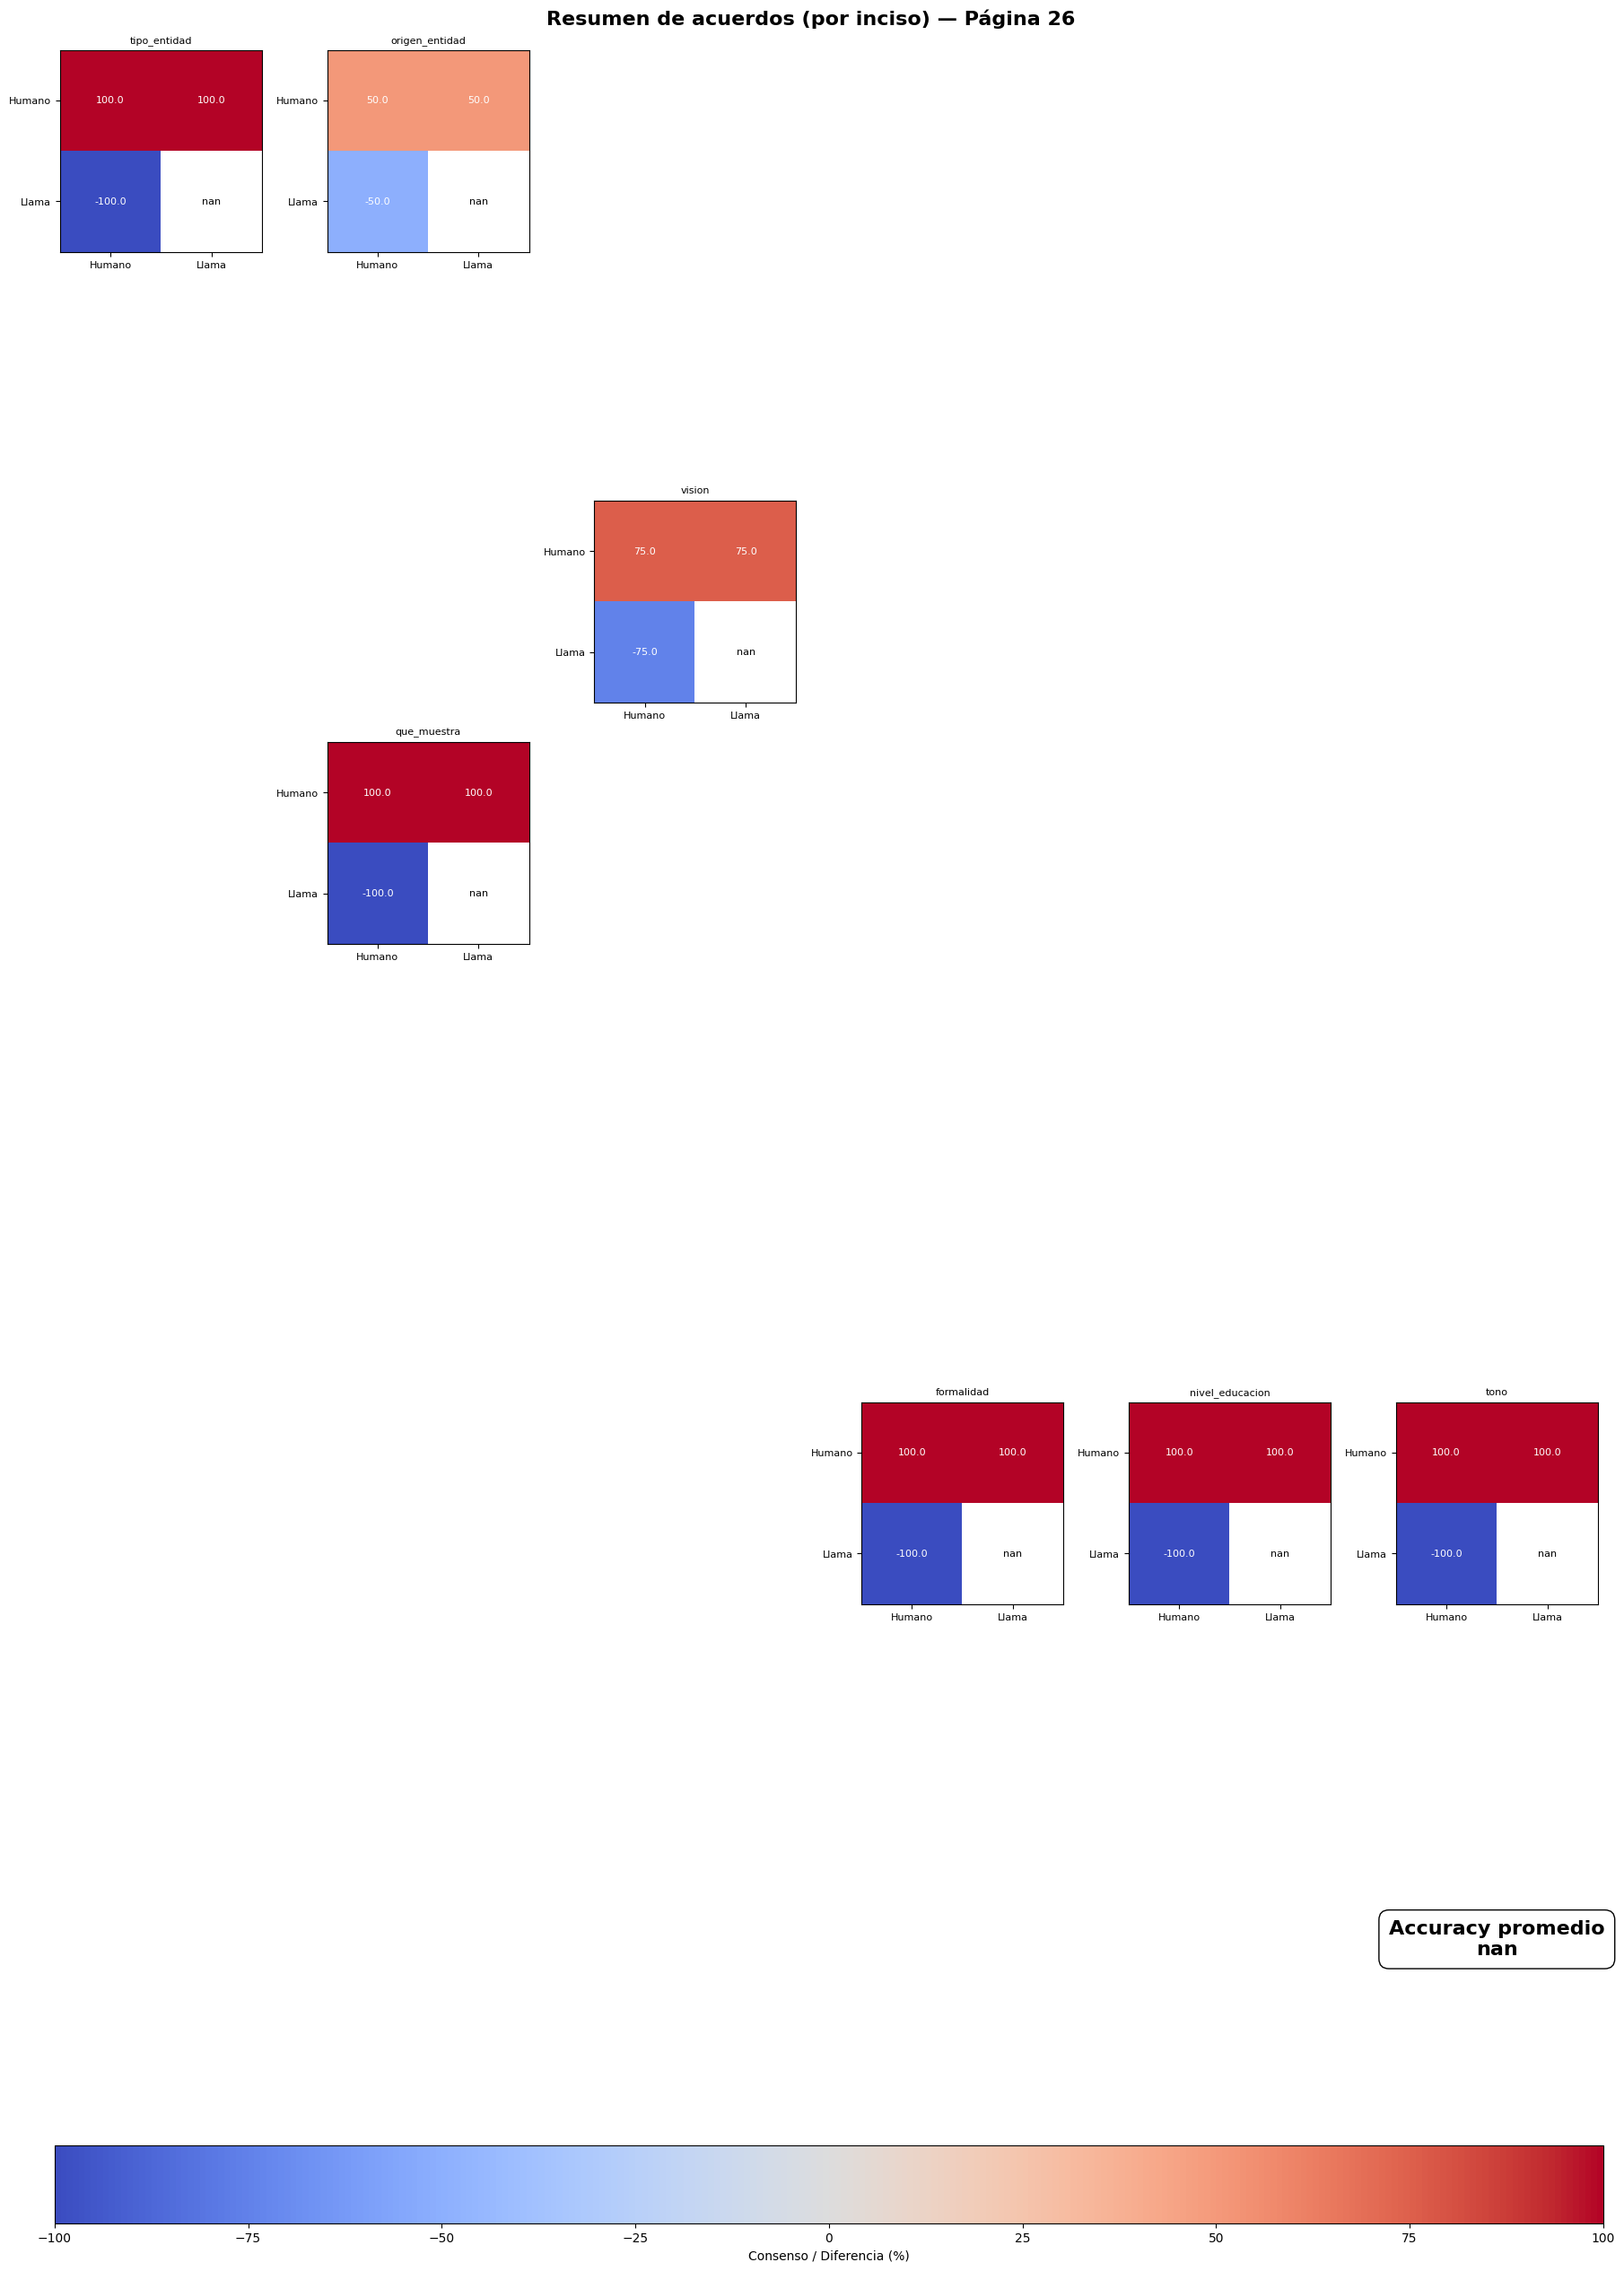

/tmp/ipykernel_5578/3382987958.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  sub.loc[~valid, "igual"] = np.nan
/tmp/ipykernel_5578/3382987958.py:96: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.12)


KeyboardInterrupt: 

In [21]:
# Orden fijo: pregunta única -> 1 item; multi -> todos sus incisos
items = []
title_map = {}

for p in preguntas:
    if p in multi_answer:
        for inc in incisos_dicts[p].keys():
            k = f"{p}::{inc.lower()}"
            items.append(k)
            title_map[k] = f"{p}: {incisos_dicts[p].get(inc, inc)}"
    else:
        items.append(p)
        title_map[p] = p

n_items = len(items)

plt.rcParams.update({"font.size": 10})
vmax = 100
vmin = -100

pags = sorted(df_consensos_items["pagina"].unique())

for pag in pags:
    sub = df_consensos_items[df_consensos_items["pagina"] == pag].set_index("item_key")
    valid = sub["humano"].notna() & sub["llama"].notna()
    sub.loc[~valid, "igual"] = np.nan

    ncols = 6
    nrows = int(np.ceil(n_items / ncols))

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(3*ncols, 2.8*nrows),
        constrained_layout=True
    )
    axes = axes.flatten()

    for i, key in enumerate(items):
        ax = axes[i]
        if key not in sub.index:
            ax.axis("off")
            continue

        fila = sub.loc[key]
        f = float(fila["humano"])
        l = float(fila["llama"])
        igual = pd.notna(f) and pd.notna(l) and (f == l)

     
        mat = np.zeros((2, 2))
        mat[0, 0] = f
        mat[1, 1] = l
        overlap = min(f, l)
        mat[0, 1] = overlap
        mat[1, 0] = -overlap

        im = ax.imshow(mat, cmap="coolwarm", vmin=vmin, vmax=vmax)

        ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
        ax.set_xticklabels(["Humano", "Llama"], fontsize=8)
        ax.set_yticklabels(["Humano", "Llama"], fontsize=8)

        ax.set_title(textwrap.fill(title_map[key], 28), fontsize=8)

        for r in range(2):
            for c in range(2):
                val = mat[r, c]
                ax.text(c, r, f"{val:.1f}", ha="center", va="center",
                        fontsize=8, color="white" if abs(val) > 40 else "black")

        if igual:
            rect = Rectangle((-0.5, -0.5), 2, 2, fill=False,
                             edgecolor="lime", linewidth=5, linestyle="--")
            ax.add_patch(rect)

    # apaga sobrantes excepto el último (lo usamos para info)
    for j in range(i+1, len(axes)-1):
        axes[j].axis("off")

    ax_info = axes[-1]
    ax_info.axis("off")
    acc_page = sub["igual"].mean()

    ax_info.text(
        0.5, 0.5,
        f"Accuracy promedio\n{acc_page:.2f}",
        ha="center", va="center",
        fontsize=16, fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="black")
    )

    cbar = fig.colorbar(im, ax=axes, orientation="horizontal",
                        fraction=0.05, pad=0.05)
    cbar.set_label("Consenso / Diferencia (%)")

    fig.subplots_adjust(bottom=0.12)
    fig.suptitle(f"Resumen de acuerdos (por inciso) — Página {pag}",
                 fontsize=16, fontweight="bold")

    plt.show()


/tmp/ipykernel_552503/3988802181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_melt, x="Métrica", y="Valor", palette="Set2", width=0.5)


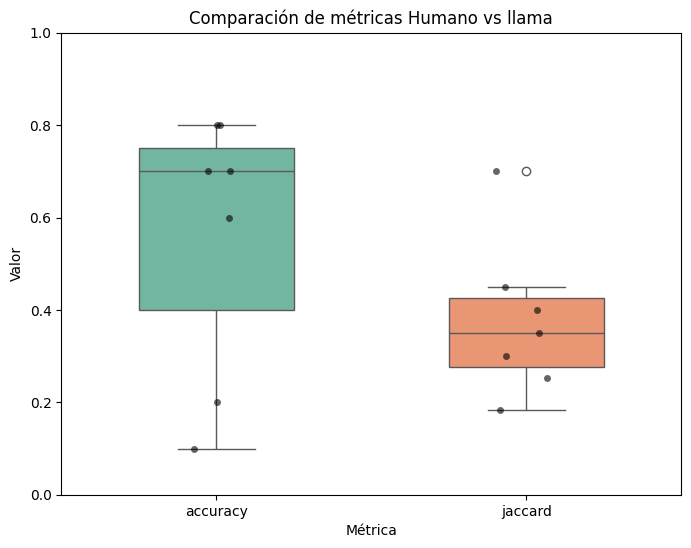

In [ ]:
metrics = pd.DataFrame({
    'accuracy': accuracies,
    'jaccard': jaccards
})

metrics_melt = metrics.melt(var_name='Métrica', value_name='Valor')

plt.figure(figsize=(8,6))
sns.boxplot(data=metrics_melt, x="Métrica", y="Valor", palette="Set2", width=0.5)
sns.stripplot(data=metrics_melt, x="Métrica", y="Valor", color="black", size=5, alpha=0.6)
plt.title("Comparación de métricas Humano vs llama")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.show()